In [13]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from scipy.cluster.hierarchy import dendrogram, linkage
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.manifold import TSNE
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.util import ngrams
from nltk import pos_tag
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import nltk
import re

warnings.filterwarnings('ignore')

plt.style.use('ggplot')
sns.set_theme(font_scale=1.2)
plt.rcParams['figure.figsize'] = (14, 10)

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\andras.janko\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\andras.janko\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\andras.janko\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\andras.janko\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\andras.janko\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [14]:
text_field_to_analyze = 'lemmatized_normalized_text'
category_field = 'category'

In [15]:
df_sample = pd.read_csv("_data/2_Medium_BBC_dataset/bbc_dataset_preprocessed.csv")

# Create a smaller sample for computational efficiency in some analyses
# sample_size = min(300000, len(df))
# df_sample = df.sample(sample_size, random_state=42)

df_sample

file_name  category                                               text  \
0      001.txt  business  Ad sales boost Time Warner profit\n\nQuarterly...   
1      002.txt  business  Dollar gains on Greenspan speech\n\nThe dollar...   
2      003.txt  business  Yukos unit buyer faces loan claim\n\nThe owner...   
3      004.txt  business  High fuel prices hit BA's profits\n\nBritish A...   
4      005.txt  business  Pernod takeover talk lifts Domecq\n\nShares in...   
...        ...       ...                                                ...   
2220   397.txt      tech  BT program to beat dialler scams\n\nBT is intr...   
2221   398.txt      tech  Spam e-mails tempt net shoppers\n\nComputer us...   
2222   399.txt      tech  Be careful how you code\n\nA new European dire...   
2223   400.txt      tech  US cyber security chief resigns\n\nThe man mak...   
2224   401.txt      tech  Losing yourself in online gaming\n\nOnline rol...   

                                           cleaned_text  \
0     ad sales boost time warner profit quarterly pr...   
1     dollar gains on greenspan speech the dollar ha...   
2     yukos unit buyer faces loan claim the owners o...   
3     high fuel prices hit ba s profits british airw...   
4     pernod takeover talk lifts domecq shares in uk...   
...                                                 ...   
2220  bt program to beat dialler scams bt is introdu...   
2221  spam e mails tempt net shoppers computer users...   
2222  be careful how you code a new european directi...   
2223  us cyber security chief resigns the man making...   
2224  losing yourself in online gaming online role p...   

                                        normalized_text  \
0     ad sale boost time warner profit quarterli pro...   
1     dollar gain greenspan speech dollar hit highes...   
2     yuko unit buyer face loan claim owner embattl ...   
3     high fuel price hit ba profit british airway b...   
4     pernod takeov talk lift domecq share uk drink ...   
...                                                 ...   
2220  bt program beat dialler scam bt introduc two i...   
2221  spam e mail tempt net shopper comput user acro...   
2222  care code new european direct could put softwa...   
2223  us cyber secur chief resign man make sure us c...   
2224  lose onlin game onlin role play game time cons...   

                             lemmatized_normalized_text  
0     ad sale boost time warner profit quarterly pro...  
1     dollar gain greenspan speech dollar hit highes...  
2     yukos unit buyer face loan claim owner embattl...  
3     high fuel price hit ba profit british airway b...  
4     pernod takeover talk lift domecq share uk drin...  
...                                                 ...  
2220  bt program beat dialler scam bt introducing tw...  
2221  spam e mail tempt net shopper computer user ac...  
2222  careful code new european directive could put ...  
2223  u cyber security chief resigns man making sure...  
2224  losing online gaming online role playing game ...  

[2225 rows x 6 columns]

In [16]:
def tokenize_processed_text(text):
    if not isinstance(text, str):
        return []

    tokens = text.split()
    return tokens

df_sample['tokens'] = df_sample[text_field_to_analyze].apply(tokenize_processed_text)

# 1. VOCABULARY ANALYSIS


1. VOCABULARY ANALYSIS

1.1 Word frequency distributions

Top 30 most frequent words across all documents:
  said: 7255
  year: 3313
  mr: 3046
  would: 2581
  also: 2156
  people: 2046
  u: 2026
  new: 1978
  one: 1942
  time: 1627
  could: 1511
  game: 1493
  last: 1394
  first: 1356
  two: 1282
  say: 1269
  world: 1229
  government: 1196
  film: 1148
  uk: 1115
  company: 1114
  make: 1090
  firm: 1002
  best: 978
  get: 968
  bn: 958
  like: 920
  told: 911
  number: 893
  back: 891


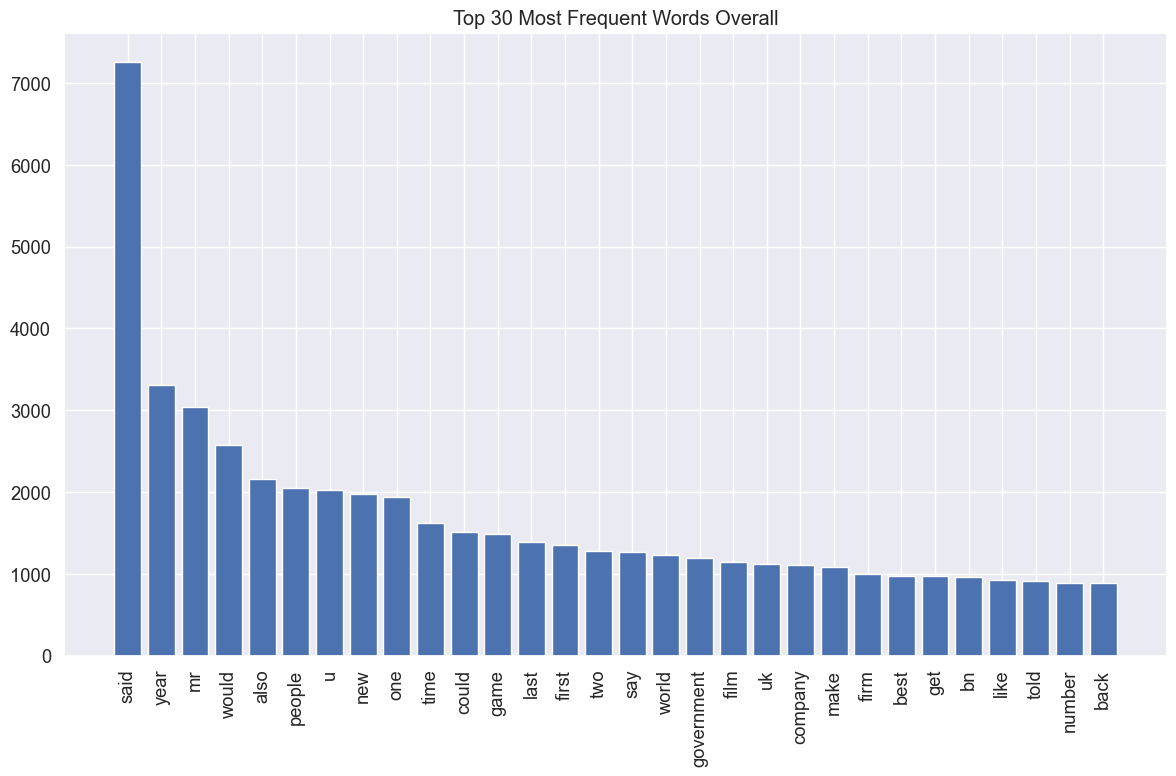


1.2 Class-specific vocabulary overlap

Vocabulary overlap between top classes:
               business entertainment  politics     sport      tech
business            1.0      0.310314    0.4028  0.289597  0.368167
entertainment  0.310314           1.0  0.350889  0.317995   0.34727
politics         0.4028      0.350889       1.0  0.328513  0.373072
sport          0.289597      0.317995  0.328513       1.0  0.277536
tech           0.368167       0.34727  0.373072  0.277536       1.0


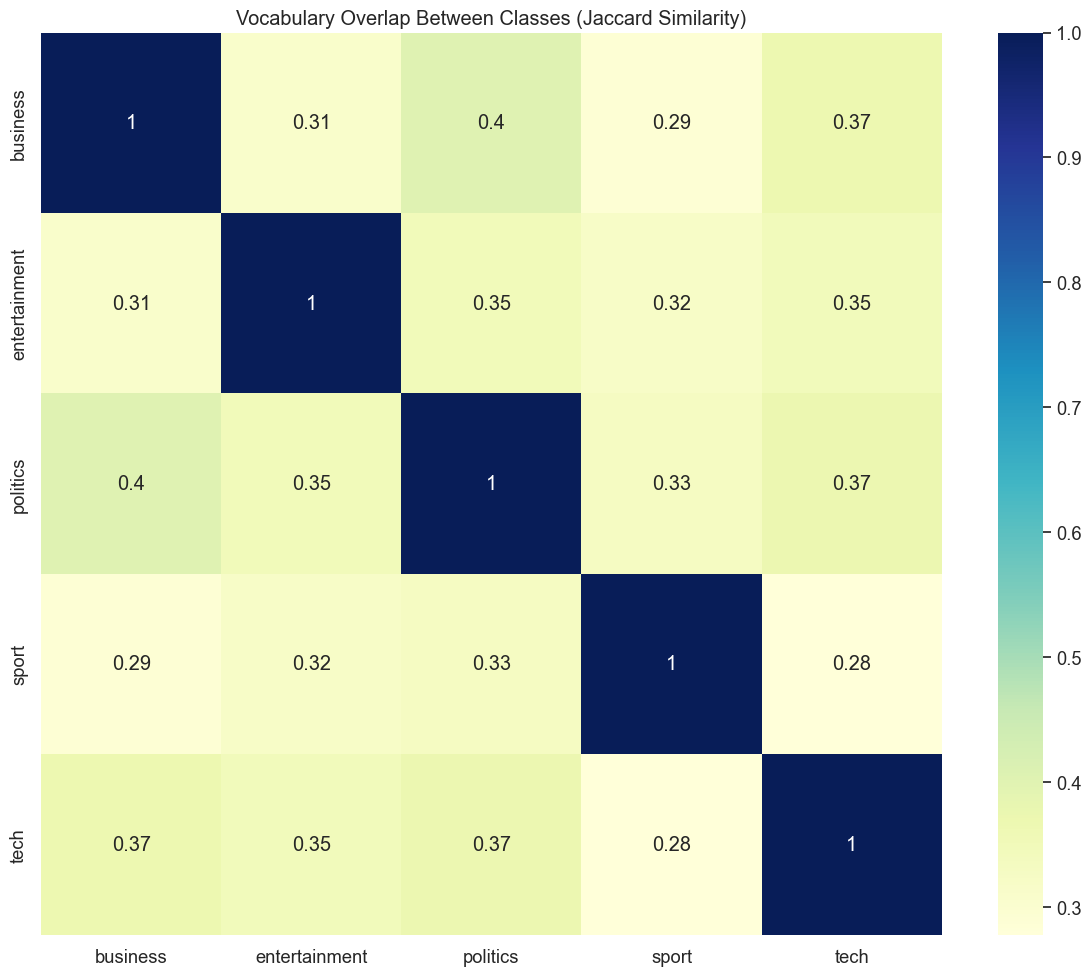


1.3 Unique word counts per class
  business: 791 unique words
    Examples: labor, wef, daiwa, triggered, motor, cadbury, investor, halt, pessimistic, primary
  entertainment: 695 unique words
    Examples: titled, godzilla, rowling, janet, bassist, evans, prestigious, michelle, bourne, bombay
  politics: 698 unique words
    Examples: tory, regret, disillusioned, challenged, drunk, mess, slogan, oppose, pledge, breached
  sport: 1037 unique words
    Examples: andre, southwell, fixture, parisse, seeded, fava, battling, mcleish, championship, cockbain
  tech: 1003 unique words
    Examples: constant, trialling, rent, thomson, printed, messenger, teething, pirated, combining, keystroke


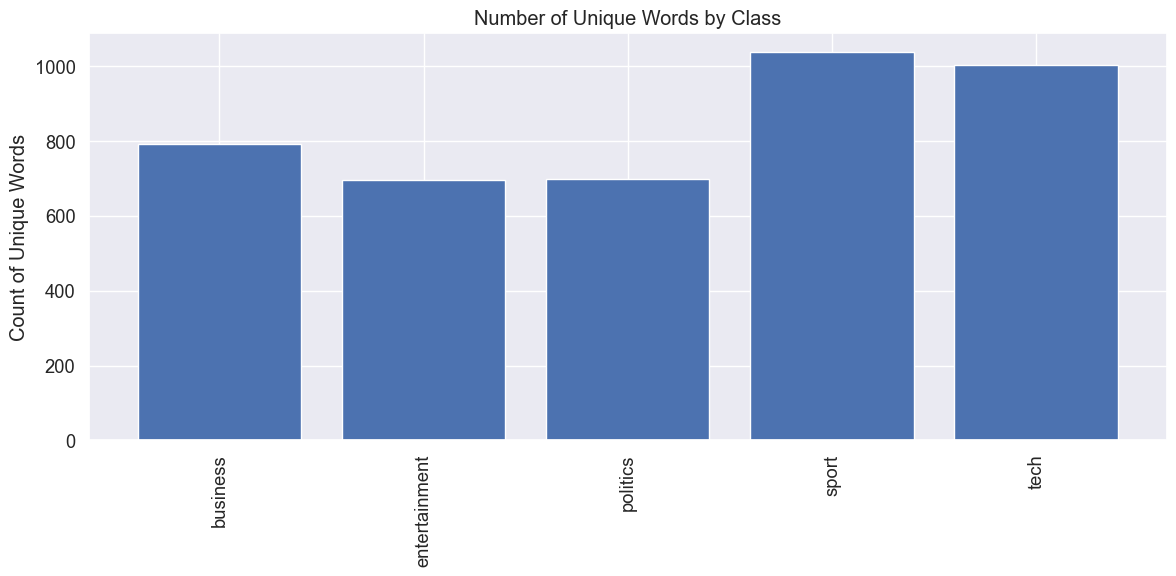

In [17]:
print("\n" + "="*80)
print("1. VOCABULARY ANALYSIS")
print("="*80)

print("\n1.1 Word frequency distributions")

# Function to get word frequency
def get_word_freq(tokens_list, top_n=30):
    all_words = [word for tokens in tokens_list for word in tokens]
    word_freq = Counter(all_words)
    return word_freq.most_common(top_n)

# Get overall word frequency
overall_word_freq = get_word_freq(df_sample['tokens'])
print("\nTop 30 most frequent words across all documents:")
for word, count in overall_word_freq:
    print(f"  {word}: {count}")

# Visualize overall word frequency
plt.figure(figsize=(12, 8))
words, counts = zip(*overall_word_freq)
plt.bar(words, counts)
plt.xticks(rotation=90)
plt.title('Top 30 Most Frequent Words Overall')
plt.tight_layout()
plt.show()
plt.close()

print("\n1.2 Class-specific vocabulary overlap")

# Function to get class-specific vocabulary
def get_class_vocab(df, class_name, min_freq=5):
    # Get documents for this class
    class_docs = df[df[category_field] == class_name][text_field_to_analyze]

    # Tokenize the processed text
    tokenized_docs = class_docs.apply(tokenize_processed_text)

    # Flatten tokens from all documents
    all_words = [word for tokens in tokenized_docs for word in tokens]

    # Filter by minimum frequency to reduce noise
    word_freq = Counter(all_words)
    vocab = {word for word, count in word_freq.items() if count >= min_freq}

    return vocab

# Get vocabulary for each top class
top_classes = df_sample[category_field].unique()
class_vocabularies = {cls: get_class_vocab(df_sample, cls) for cls in top_classes}

# Calculate vocabulary overlap between classes
print("\nVocabulary overlap between top classes:")
overlap_matrix = pd.DataFrame(index=top_classes, columns=top_classes)

for cls1 in top_classes:
    for cls2 in top_classes:
        vocab1 = class_vocabularies[cls1]
        vocab2 = class_vocabularies[cls2]

        if len(vocab1) == 0 or len(vocab2) == 0:
            overlap = 0
        else:
            # Jaccard similarity
            overlap = len(vocab1.intersection(vocab2)) / len(vocab1.union(vocab2))

        overlap_matrix.loc[cls1, cls2] = overlap

print(overlap_matrix)

# Visualize vocabulary overlap with a heatmap
plt.figure(figsize=(12, 10))
overlap_matrix_float = overlap_matrix.astype(float)
sns.heatmap(overlap_matrix_float, annot=True, cmap='YlGnBu')
plt.title('Vocabulary Overlap Between Classes (Jaccard Similarity)')
plt.tight_layout()
plt.show()
plt.close()

print("\n1.3 Unique word counts per class")

# Calculate unique word counts
unique_word_counts = {}
for cls in top_classes:
    class_vocab = class_vocabularies[cls]

    # Find words unique to this class
    unique_words = set(class_vocab)
    for other_cls in top_classes:
        if other_cls != cls:
            unique_words -= class_vocabularies[other_cls]

    unique_word_counts[cls] = len(unique_words)
    print(f"  {cls}: {len(unique_words)} unique words")
    # Print some examples of unique words
    unique_word_list = list(unique_words)[:10]  # Show up to 10 examples
    if unique_word_list:
        print(f"    Examples: {', '.join(unique_word_list)}")

# Visualize unique word counts
plt.figure(figsize=(12, 6))
plt.bar(unique_word_counts.keys(), unique_word_counts.values())
plt.xticks(rotation=90)
plt.title('Number of Unique Words by Class')
plt.ylabel('Count of Unique Words')
plt.tight_layout()
plt.show()
plt.close()

# 2. TEXT VISUALIZATION


2. TEXT VISUALIZATION

2.1 Word clouds for each class


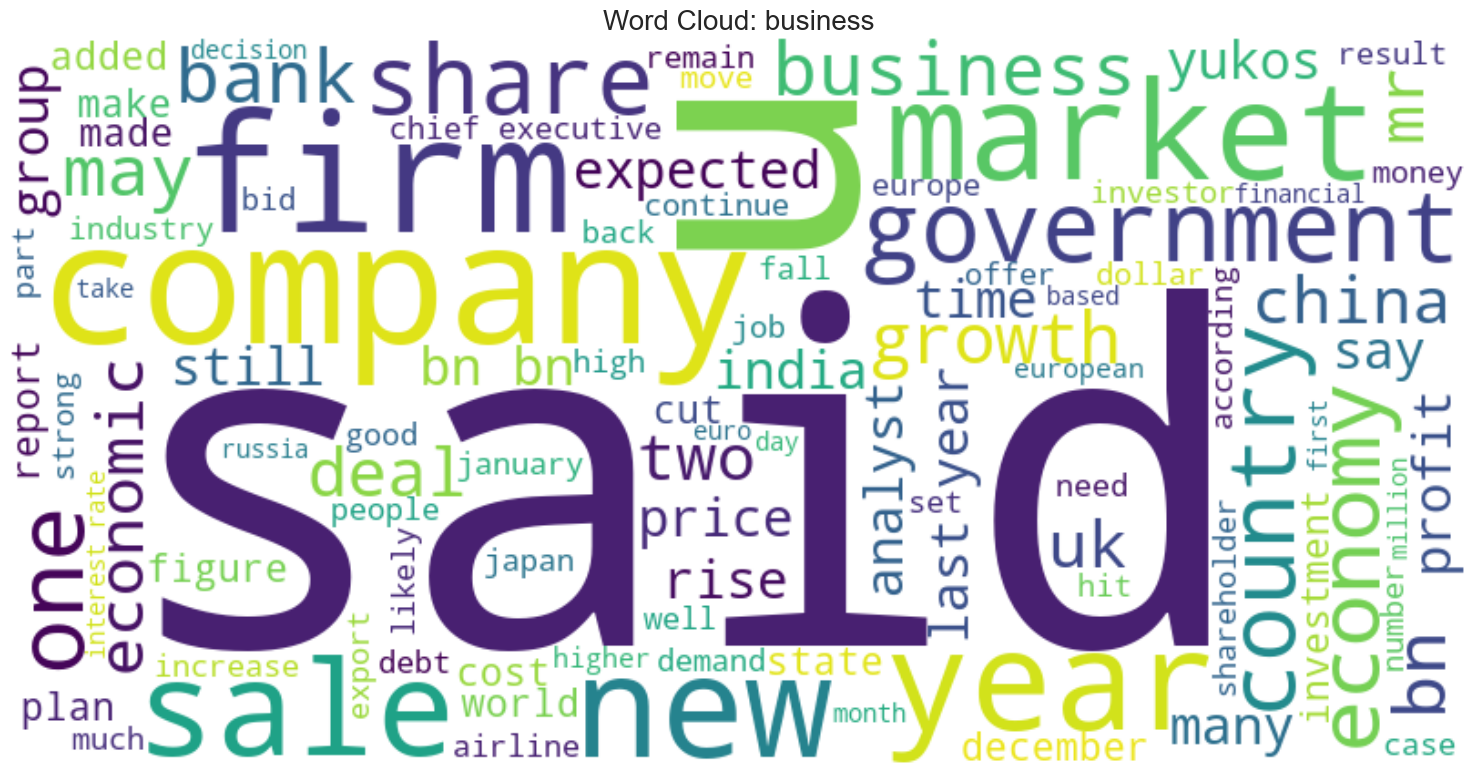

  Created word cloud for business


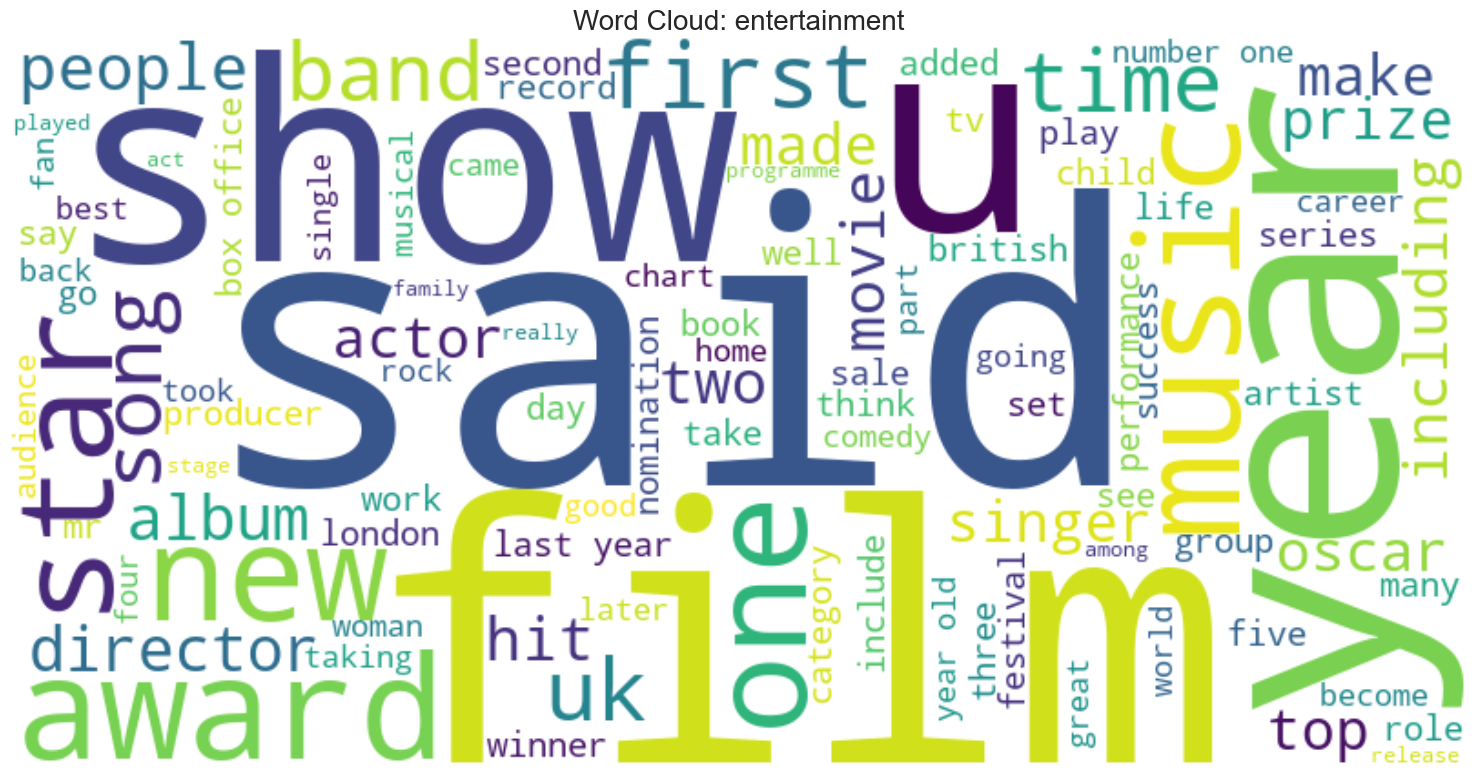

  Created word cloud for entertainment


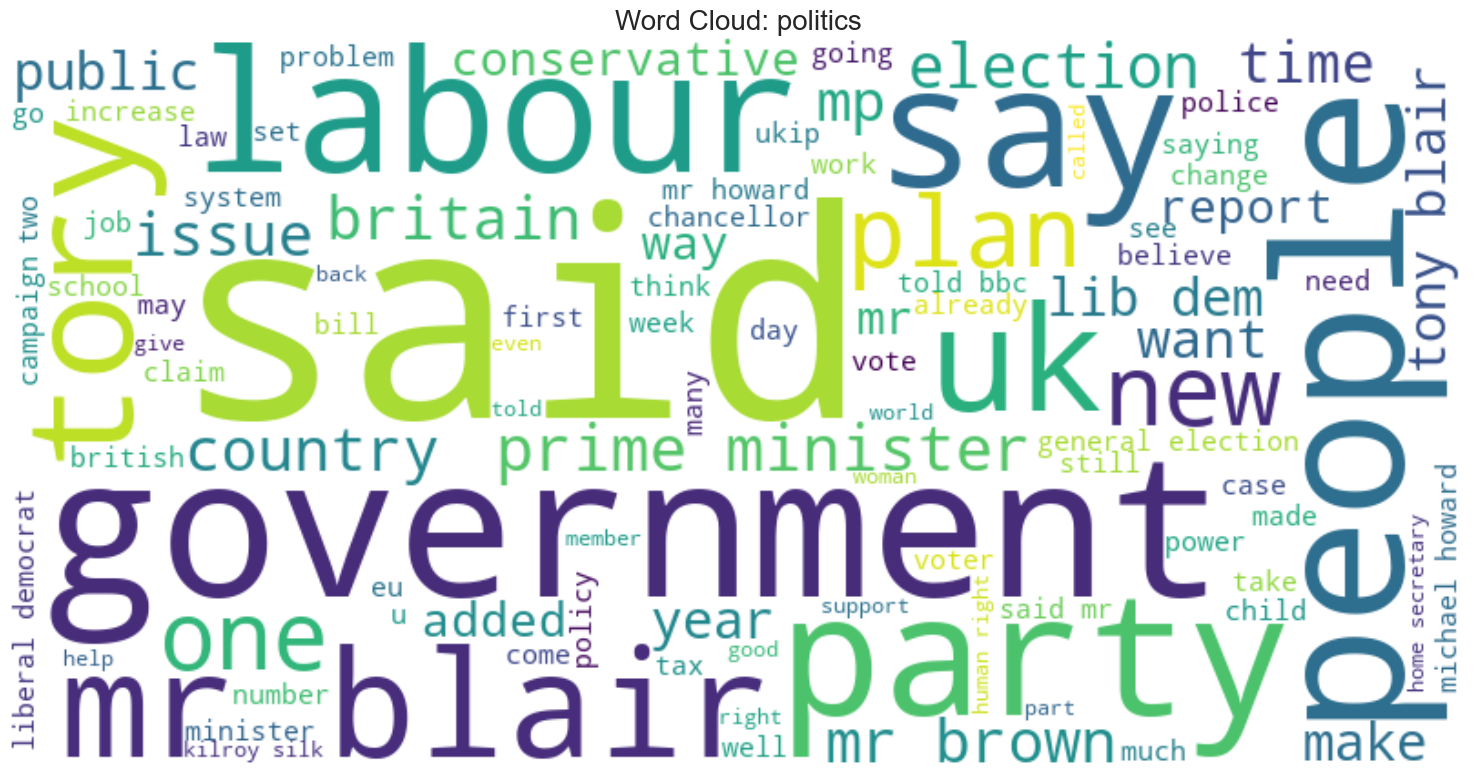

  Created word cloud for politics


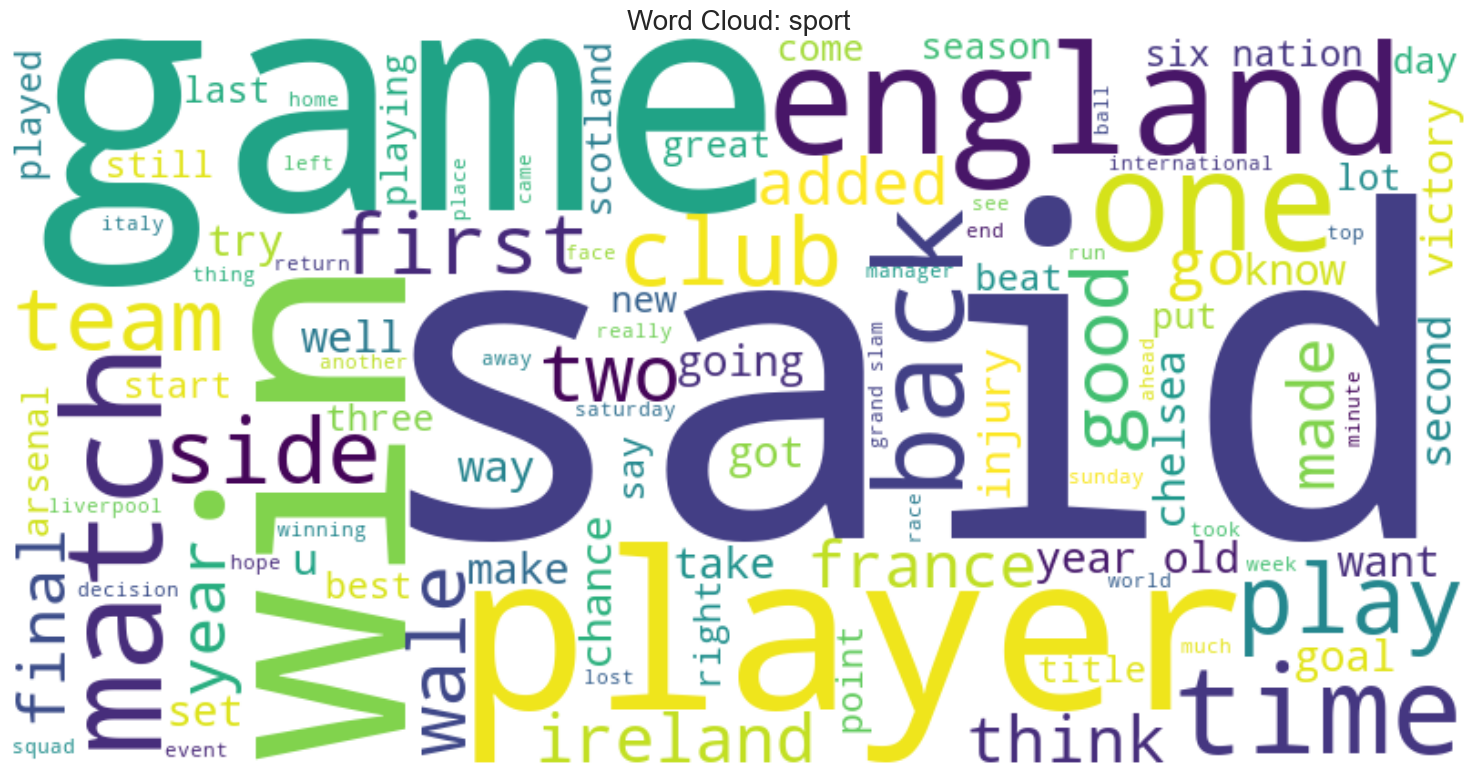

  Created word cloud for sport


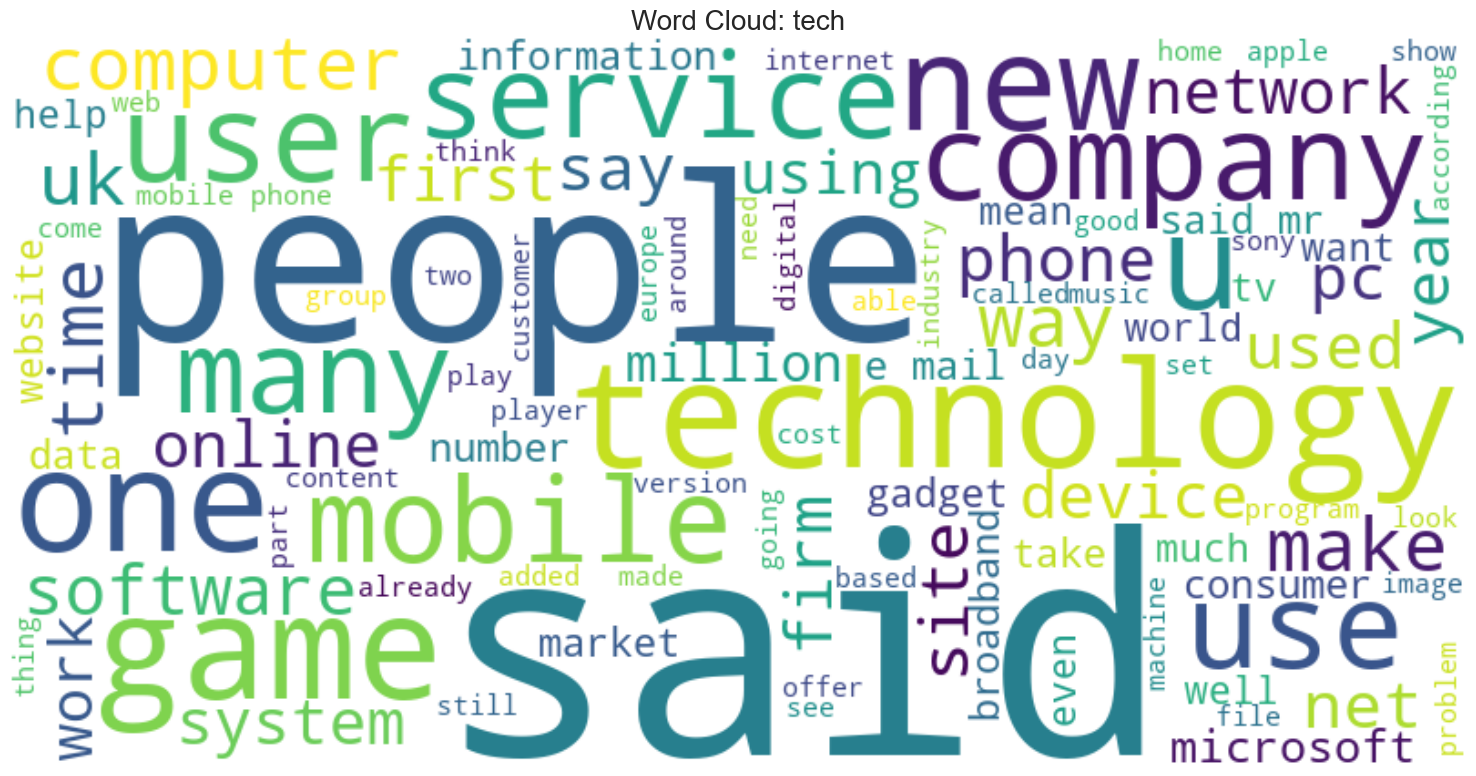

  Created word cloud for tech

2.2 n-gram frequency charts

Top 20 most frequent bigrams:
  last year: 502
  told bbc: 364
  said mr: 363
  year old: 341
  mr blair: 335
  prime minister: 321
  mr brown: 256
  e mail: 224
  chief executive: 208
  said would: 192
  last week: 188
  tony blair: 186
  mobile phone: 183
  bbc news: 178
  general election: 177
  new york: 174
  bn bn: 169
  six nation: 163
  year ago: 162
  mr howard: 160

Top 20 most frequent trigrams:
  told bbc news: 147
  bbc news website: 97
  told bbc radio: 76
  leader michael howard: 58
  mr kilroy silk: 57
  mr blair said: 54
  million dollar baby: 53
  radio today programme: 49
  told bbc sport: 48
  bbc radio today: 47
  tory leader michael: 41
  mr howard said: 41
  next general election: 39
  chancellor gordon brown: 33
  prime minister tony: 32
  minister tony blair: 32
  leader charles kennedy: 32
  digital music player: 30
  george w bush: 29
  two year ago: 28


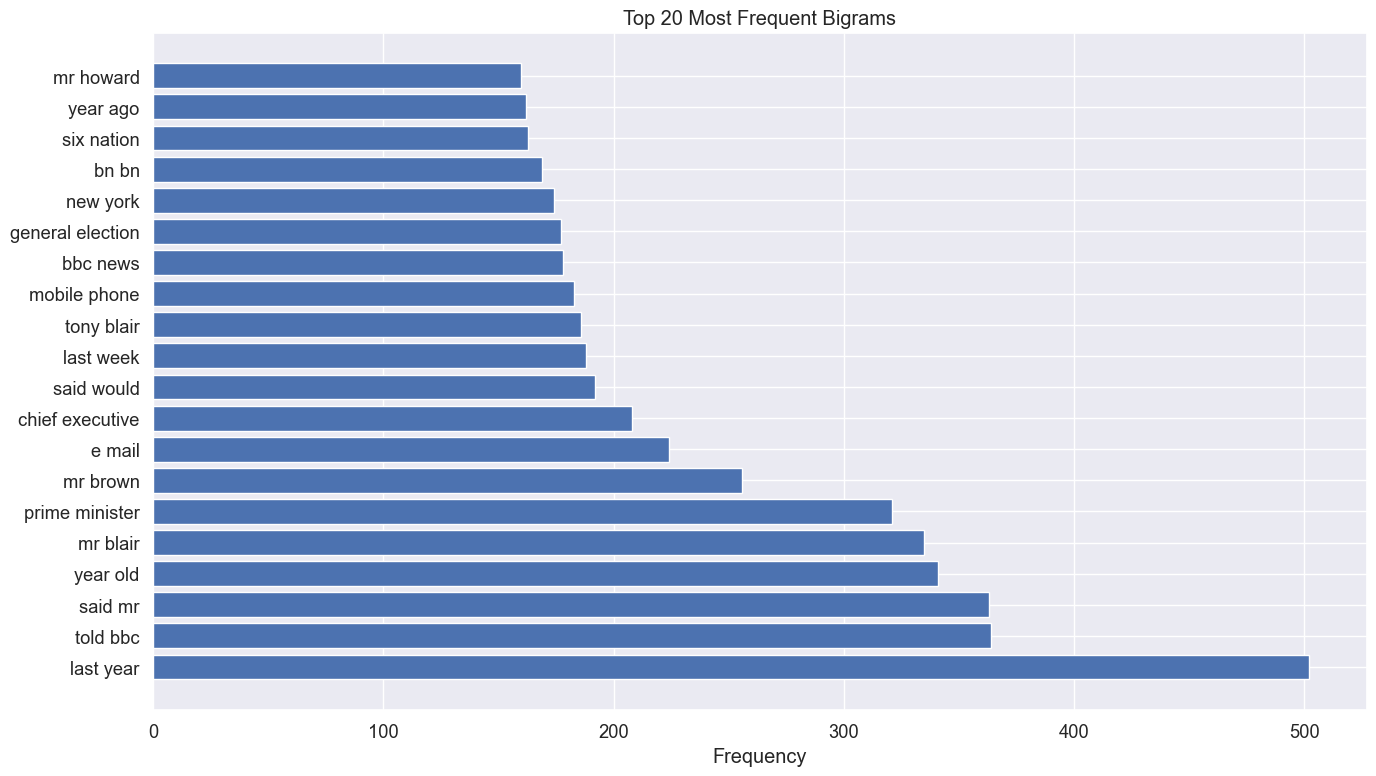

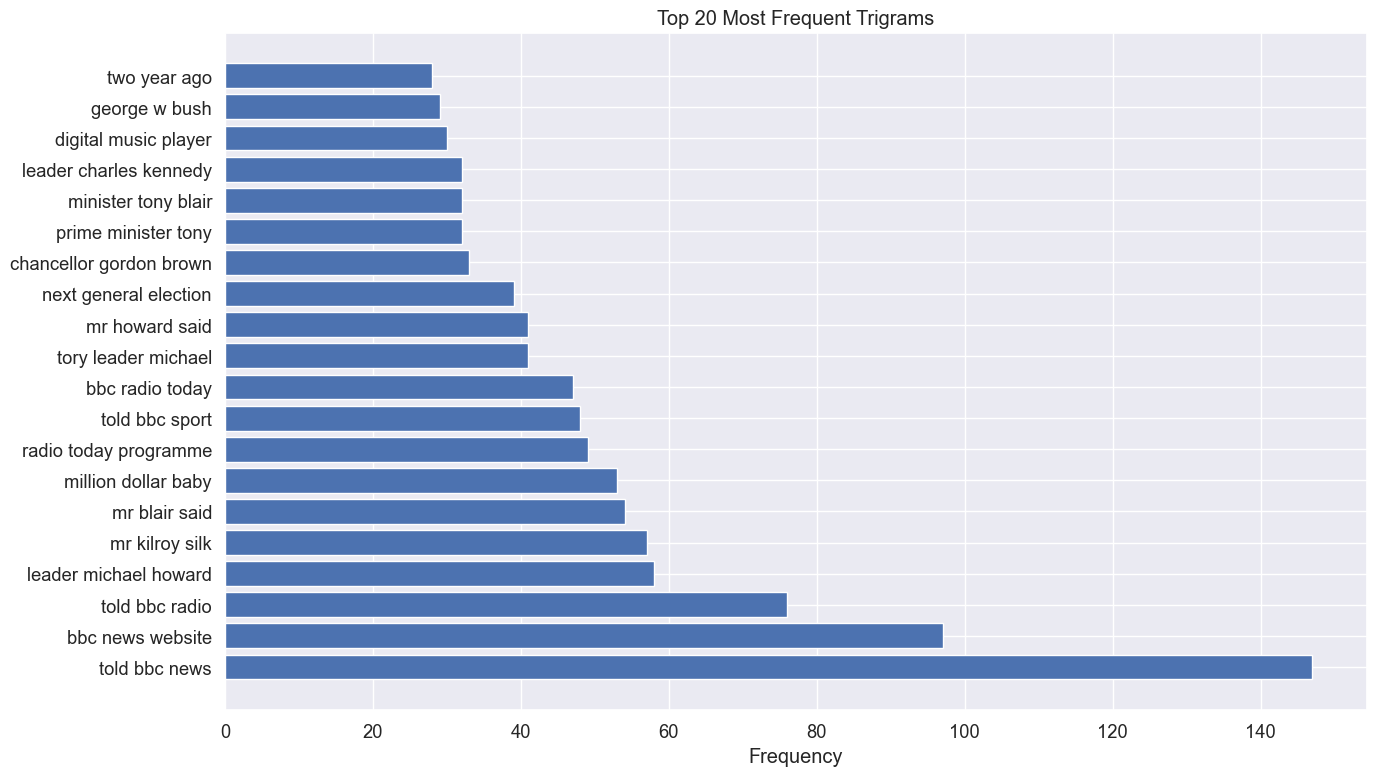


2.3 Distribution of text lengths by class


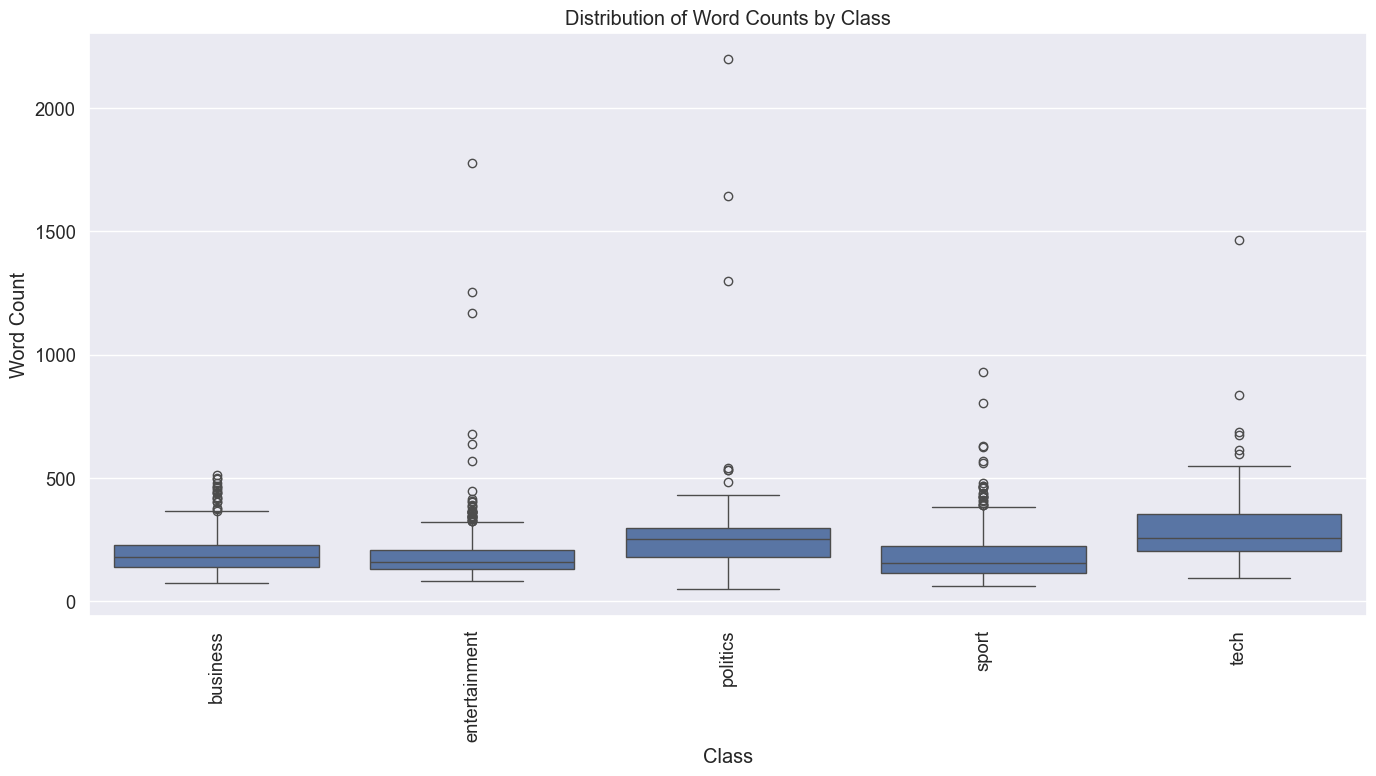


Statistical summary of word counts by class:
               count        mean         std   min    25%    50%    75%  \
category                                                                  
business       510.0  193.364706   77.526295  75.0  137.0  178.0  228.5   
entertainment  386.0  191.531088  135.507283  83.0  132.0  157.0  208.0   
politics       417.0  253.189448  152.390393  48.0  181.0  251.0  297.0   
sport          511.0  182.162427  103.901174  62.0  114.0  153.0  223.5   
tech           401.0  286.458853  125.494318  96.0  204.0  258.0  353.0   

                  max  
category               
business        510.0  
entertainment  1777.0  
politics       2198.0  
sport           930.0  
tech           1465.0  


In [18]:
print("\n" + "="*80)
print("2. TEXT VISUALIZATION")
print("="*80)

print("\n2.1 Word clouds for each class")

# Function to create word cloud
def create_word_cloud(text_series, title, filename):
    text = ' '.join([' '.join(tokens) for tokens in text_series])
    wordcloud = WordCloud(width=800, height=400, background_color='white',
                         max_words=100, contour_width=3, contour_color='steelblue')
    wordcloud.generate(text)

    plt.figure(figsize=(16, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=20)
    plt.tight_layout()
    plt.show()
    plt.close()

# Create word cloud for each top class
for cls in top_classes:
    # Get processed abstracts for this class
    class_docs = df_sample[df_sample[category_field] == cls][text_field_to_analyze]
    # Tokenize
    tokenized_docs = class_docs.apply(tokenize_processed_text)
    create_word_cloud(tokenized_docs, f'Word Cloud: {cls}', f'wordcloud_{cls}.png')
    print(f"  Created word cloud for {cls}")

print("\n2.2 n-gram frequency charts")

# Function to get n-grams
def get_ngrams(tokens_list, n=2, top_n=20):
    all_ngrams = []
    for tokens in tokens_list:
        if len(tokens) >= n:
            all_ngrams.extend([' '.join(gram) for gram in ngrams(tokens, n)])

    ngram_freq = Counter(all_ngrams)
    return ngram_freq.most_common(top_n)

# Get bigrams and trigrams
print("\nTop 20 most frequent bigrams:")
bigrams = get_ngrams(df_sample['tokens'], n=2)
for gram, count in bigrams:
    print(f"  {gram}: {count}")

print("\nTop 20 most frequent trigrams:")
trigrams = get_ngrams(df_sample['tokens'], n=3)
for gram, count in trigrams:
    print(f"  {gram}: {count}")

# Visualize n-grams
def plot_ngrams(ngrams, title, filename):
    labels, values = zip(*ngrams)
    plt.figure(figsize=(14, 8))
    plt.barh(range(len(labels)), values, align='center')
    plt.yticks(range(len(labels)), labels)
    plt.xlabel('Frequency')
    plt.title(title)
    plt.tight_layout()
    plt.show()
    plt.close()

plot_ngrams(bigrams, 'Top 20 Most Frequent Bigrams', 'top_bigrams.png')
plot_ngrams(trigrams, 'Top 20 Most Frequent Trigrams', 'top_trigrams.png')

print("\n2.3 Distribution of text lengths by class")

# Calculate text lengths
df_sample['word_count'] = df_sample['tokens'].apply(len)

# Visualize text length distribution by class
plt.figure(figsize=(14, 8))
sns.boxplot(x=category_field, y='word_count', data=df_sample)
plt.title('Distribution of Word Counts by Class')
plt.xlabel('Class')
plt.ylabel('Word Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
plt.close()

# Statistical summary of text lengths by class
print("\nStatistical summary of word counts by class:")
word_count_stats = df_sample.groupby(category_field)['word_count'].describe()
print(word_count_stats)

# 3. LINGUISTIC ANALYSIS


3. LINGUISTIC ANALYSIS

3.1 Parts-of-speech distributions

Calculating POS distributions...

Parts of speech distribution:
  Nouns: 54788 (50.07%)
  Adjectives: 22341 (20.42%)
  Verbs: 21357 (19.52%)
  Adverbs: 5685 (5.20%)
  Prepositions: 1858 (1.70%)
  Other: 1547 (1.41%)
  Numbers: 1501 (1.37%)
  Determiners: 202 (0.18%)
  Conjunctions: 73 (0.07%)
  Pronouns: 64 (0.06%)


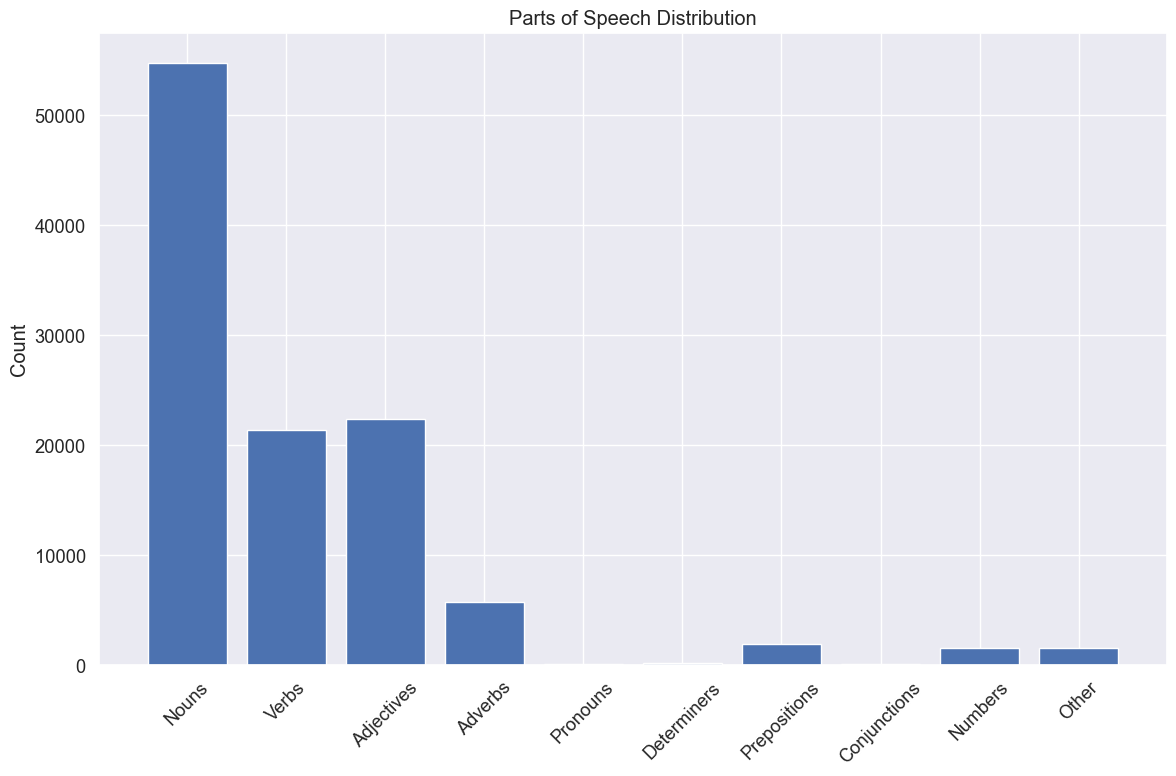

<Figure size 1600x1000 with 0 Axes>

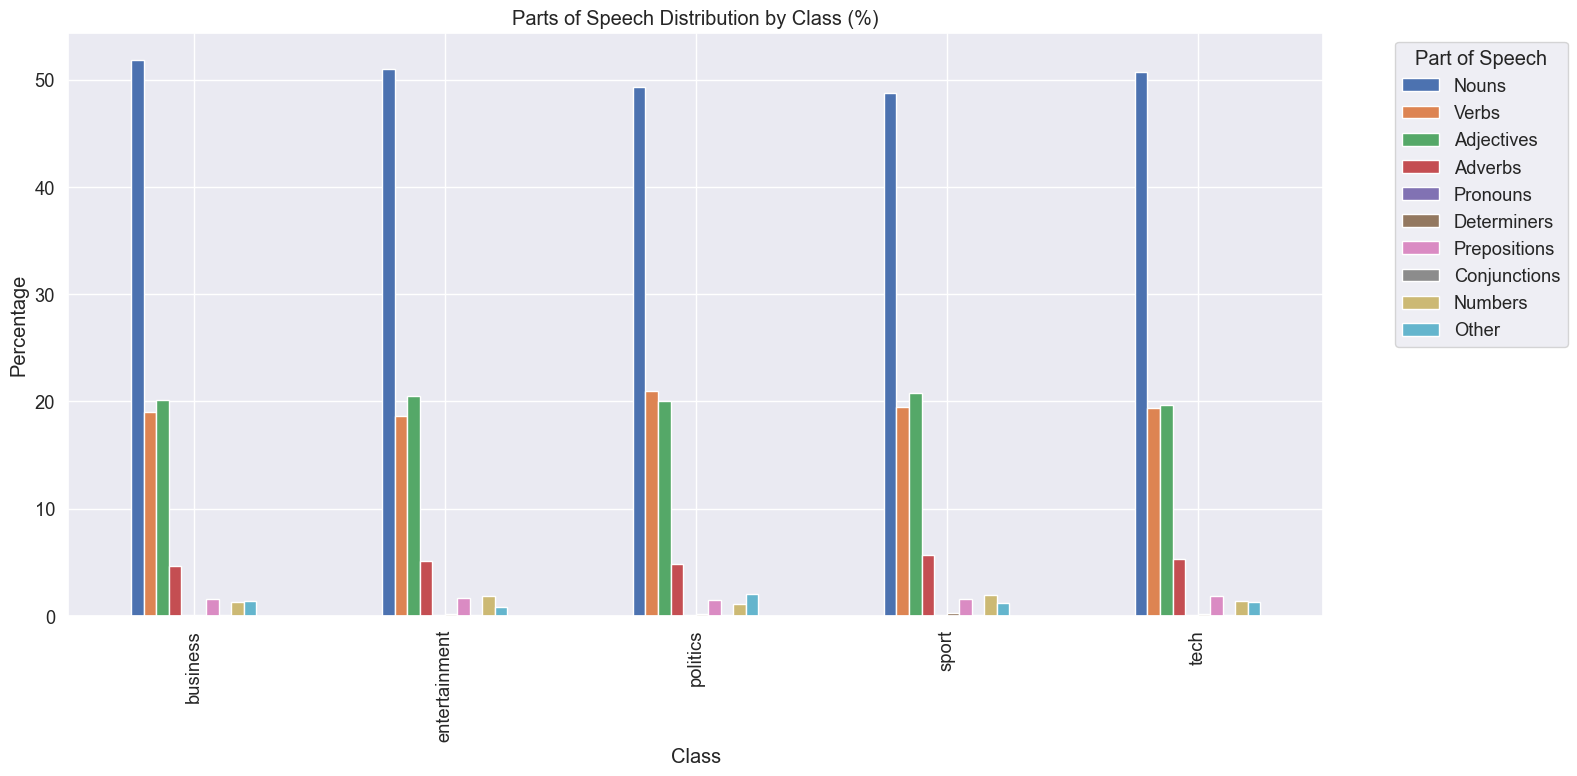

In [19]:
print("\n" + "="*80)
print("3. LINGUISTIC ANALYSIS")
print("="*80)

print("\n3.1 Parts-of-speech distributions")

# Function to get POS tags
def get_pos_tags(tokens_list, sample_size=500):
    # Take a random sample to improve performance
    if len(tokens_list) > sample_size:
        sampled_tokens = tokens_list.sample(sample_size, random_state=42)
    else:
        sampled_tokens = tokens_list

    pos_counts = Counter()
    for tokens in sampled_tokens:
        # Skip empty token lists
        if not tokens:
            continue

        # Get POS tags for the tokens
        tagged = pos_tag(tokens)
        pos_counts.update([tag for _, tag in tagged])

    return pos_counts

# Get POS distribution for the overall dataset
print("\nCalculating POS distributions...")
pos_counts = get_pos_tags(df_sample['tokens'])

# Group similar POS tags for better visualization
pos_groups = {
    'Nouns': ['NN', 'NNS', 'NNP', 'NNPS'],
    'Verbs': ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'],
    'Adjectives': ['JJ', 'JJR', 'JJS'],
    'Adverbs': ['RB', 'RBR', 'RBS'],
    'Pronouns': ['PRP', 'PRP$', 'WP', 'WP$'],
    'Determiners': ['DT', 'PDT', 'WDT'],
    'Prepositions': ['IN'],
    'Conjunctions': ['CC'],
    'Numbers': ['CD'],
    'Other': ['FW', 'LS', 'MD', 'RP', 'SYM', 'TO', 'UH', 'EX']
}

grouped_pos_counts = {}
for group, tags in pos_groups.items():
    grouped_pos_counts[group] = sum(pos_counts[tag] for tag in tags)

# Print POS distribution
print("\nParts of speech distribution:")
for group, count in sorted(grouped_pos_counts.items(), key=lambda x: x[1], reverse=True):
    print(f"  {group}: {count} ({100 * count / sum(grouped_pos_counts.values()):.2f}%)")

# Visualize POS distribution
plt.figure(figsize=(12, 8))
plt.bar(grouped_pos_counts.keys(), grouped_pos_counts.values())
plt.title('Parts of Speech Distribution')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.close()

# Compare POS distribution across classes
class_pos = {}
for cls in top_classes:
    class_tokens = df_sample[df_sample[category_field] == cls]['tokens']
    class_pos[cls] = get_pos_tags(class_tokens)

# Normalize and organize POS data for visualization
pos_by_class = pd.DataFrame(index=top_classes)
for group, tags in pos_groups.items():
    group_counts = []
    for cls in top_classes:
        count = sum(class_pos[cls][tag] for tag in tags)
        # Normalize by total counts in this class
        total = sum(class_pos[cls].values())
        group_counts.append(100 * count / total if total > 0 else 0)

    pos_by_class[group] = group_counts

# Visualize POS comparison
plt.figure(figsize=(16, 10))
pos_by_class.plot(kind='bar', figsize=(16, 8))
plt.title('Parts of Speech Distribution by Class (%)')
plt.xlabel('Class')
plt.ylabel('Percentage')
plt.legend(title='Part of Speech', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
plt.close()

# 4. SEMANTIC EXPLORATION


4. SEMANTIC EXPLORATION

4.1 Semantic similarity analysis

Creating document vectors using TF-IDF...
Calculating document similarity...

Semantic similarity results:
  Average within-class similarity: 0.0566
  Average between-class similarity: 0.0437
  Ratio (within/between): 1.2961


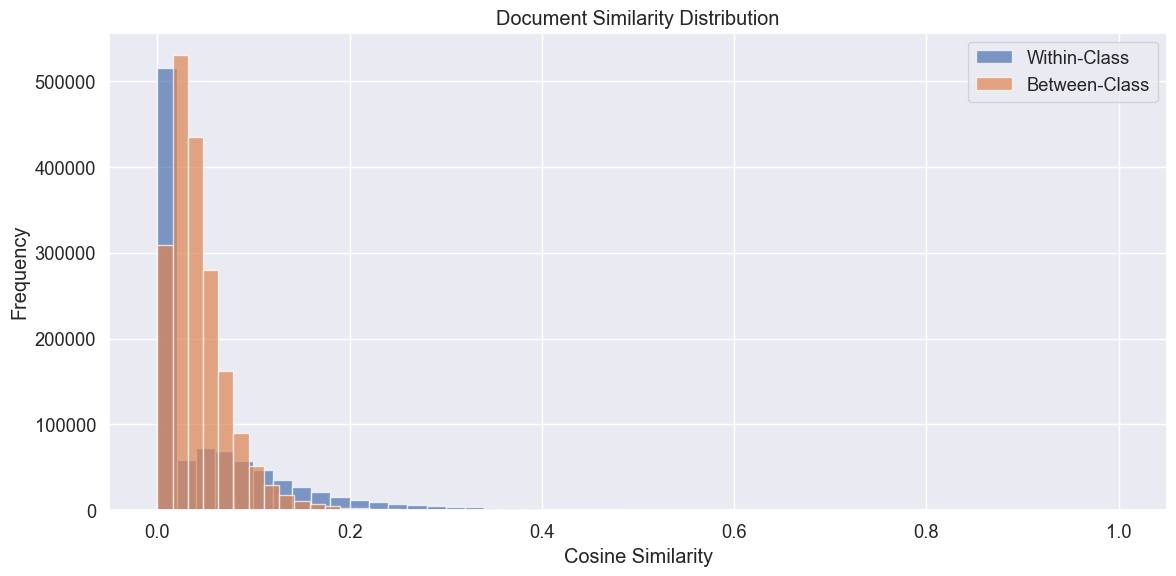

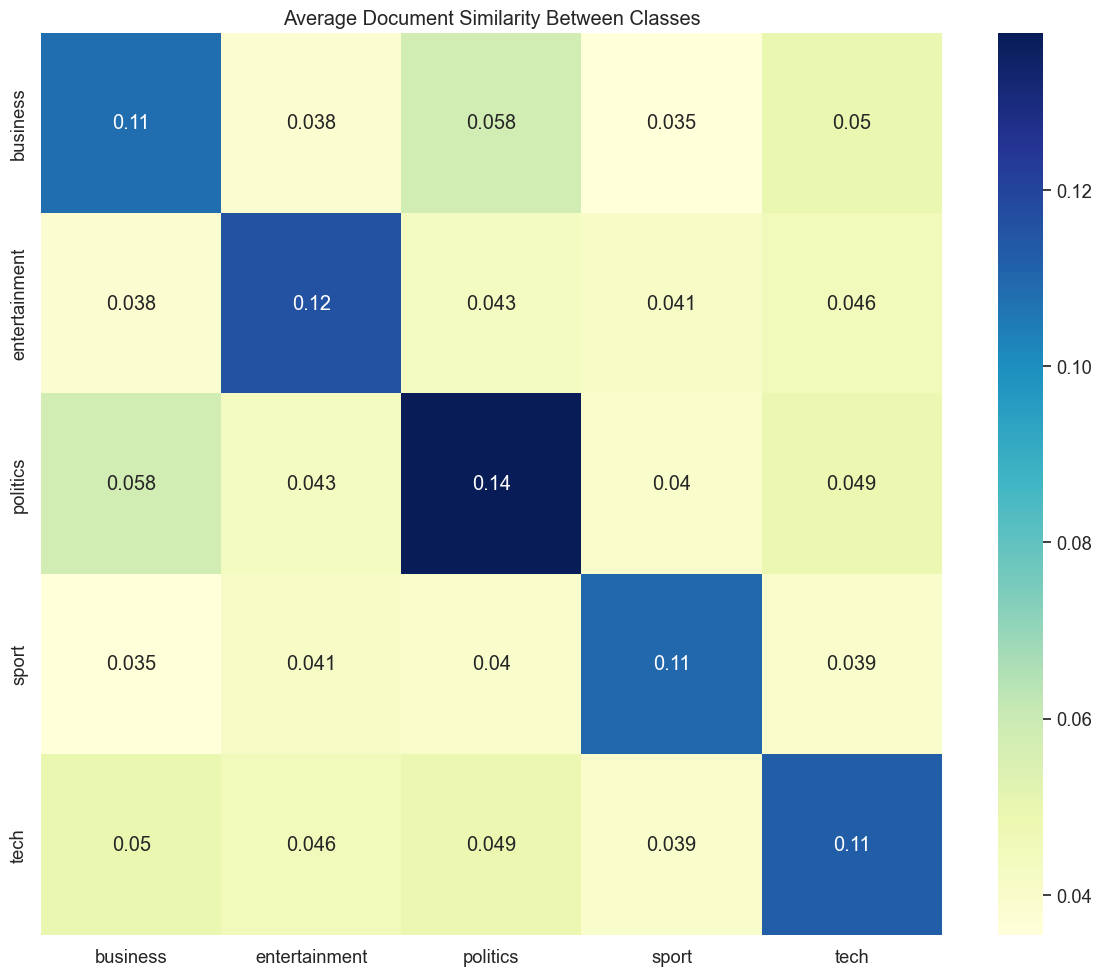

In [20]:
print("\n" + "="*80)
print("4. SEMANTIC EXPLORATION")
print("="*80)

print("\n4.1 Semantic similarity analysis")

# Use TF-IDF to create document vectors
print("\nCreating document vectors using TF-IDF...")
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set maximum samples per class to control memory usage
MAX_SAMPLES_PER_CLASS = 500

# Fill NA values
df_sample[text_field_to_analyze] = df_sample[text_field_to_analyze].fillna('')

# Create a controlled sample for analysis
controlled_sample_indices = []
class_to_sample_indices = {}

# Sample each class evenly
for cls in top_classes:
    # Get indices for this class
    cls_indices = df_sample[df_sample[category_field] == cls].index.tolist()
    # Take up to MAX_SAMPLES_PER_CLASS samples per class
    if len(cls_indices) > MAX_SAMPLES_PER_CLASS:
        sampled_indices = np.random.choice(cls_indices, MAX_SAMPLES_PER_CLASS, replace=False).tolist()
    else:
        sampled_indices = cls_indices

    # Store indices for this class
    class_to_sample_indices[cls] = sampled_indices
    controlled_sample_indices.extend(sampled_indices)

# Create a new DataFrame with just the controlled sample
controlled_df = df_sample.loc[controlled_sample_indices].copy()

# Create TF-IDF vectors for the controlled sample
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(controlled_df[text_field_to_analyze])

# Calculate document similarity using linear_kernel (more efficient for sparse matrices)
print("Calculating document similarity...")
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Prepare to track within-class and between-class similarities
within_class_sim = []
between_class_sim = []

# Create a lookup from original index to position in controlled sample
sample_position_lookup = {idx: pos for pos, idx in enumerate(controlled_df.index)}

# Track index positions for each class in the similarity matrix
class_indices = {}
for cls in top_classes:
    # Get original indices for this class
    original_indices = class_to_sample_indices[cls]
    # Convert to positions in the similarity matrix
    adjusted_indices = [sample_position_lookup[idx] for idx in original_indices]
    class_indices[cls] = adjusted_indices

# Calculate within-class similarity
for cls, indices in class_indices.items():
    if len(indices) > 1:  # Need at least 2 documents
        # Get similarity matrix for just this class
        class_sim = cosine_sim[np.ix_(indices, indices)]
        # Get upper triangle (excluding diagonal)
        upper_tri = np.triu(class_sim, k=1)
        # Store all similarity values
        within_class_sim.extend(upper_tri.flatten())

# Calculate between-class similarity
for i, (cls1, indices1) in enumerate(class_indices.items()):
    for cls2, indices2 in list(class_indices.items())[i+1:]:
        # Get cross-similarity between classes
        cross_sim = cosine_sim[np.ix_(indices1, indices2)]
        # Store all similarity values
        between_class_sim.extend(cross_sim.flatten())

# Summarize results
print("\nSemantic similarity results:")
print(f"  Average within-class similarity: {np.mean(within_class_sim):.4f}")
print(f"  Average between-class similarity: {np.mean(between_class_sim):.4f}")
print(f"  Ratio (within/between): {np.mean(within_class_sim)/np.mean(between_class_sim):.4f}")

# Visualize similarity distribution
plt.figure(figsize=(12, 6))
plt.hist(within_class_sim, bins=50, alpha=0.7, label='Within-Class')
plt.hist(between_class_sim, bins=50, alpha=0.7, label='Between-Class')
plt.title('Document Similarity Distribution')
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()
plt.close()

# Create a similarity heatmap for top classes
class_avg_sim = pd.DataFrame(index=top_classes, columns=top_classes, dtype=float)
class_avg_sim.fillna(0.0, inplace=True)  # Initialize with zeros

for i, cls1 in enumerate(top_classes):
    for j, cls2 in enumerate(top_classes):
        indices1 = class_indices.get(cls1, [])
        indices2 = class_indices.get(cls2, [])

        if indices1 and indices2:  # Check if not empty
            cross_sim = cosine_sim[np.ix_(indices1, indices2)]
            sim_value = float(np.mean(cross_sim))
            class_avg_sim.loc[cls1, cls2] = sim_value

# Ensure all values are numeric
class_avg_sim = class_avg_sim.astype(float)

# Visualize class similarity
plt.figure(figsize=(12, 10))
sns.heatmap(class_avg_sim, annot=True, cmap='YlGnBu')
plt.title('Average Document Similarity Between Classes')
plt.tight_layout()
plt.show()
plt.close()

# 5. FEATURE CORRELATION


5. FEATURE CORRELATION

5.1 Statistical relationship between text features and classes

Creating document-term matrix...

Top 20 most discriminative terms across classes:
          Term   Chi-Square        p-value
25        film  3744.677611   0.000000e+00
51          mr  3194.847213   0.000000e+00
40      labour  3105.526267   0.000000e+00
59       party  2731.088745   0.000000e+00
20    election  2498.297253   0.000000e+00
49      mobile  2478.404683   0.000000e+00
83  technology  2453.105958   0.000000e+00
5        blair  2359.052882   0.000000e+00
87        tory  2237.237410   0.000000e+00
92        user  2107.722858   0.000000e+00
61       phone  2037.477992   0.000000e+00
1        award  1962.324699   0.000000e+00
6           bn  1926.785629   0.000000e+00
30  government  1767.951411   0.000000e+00
27        game  1760.286271   0.000000e+00
48    minister  1696.227340   0.000000e+00
60      people  1667.648917   0.000000e+00
4         best  1485.908517   0.000000e+00
52       mu

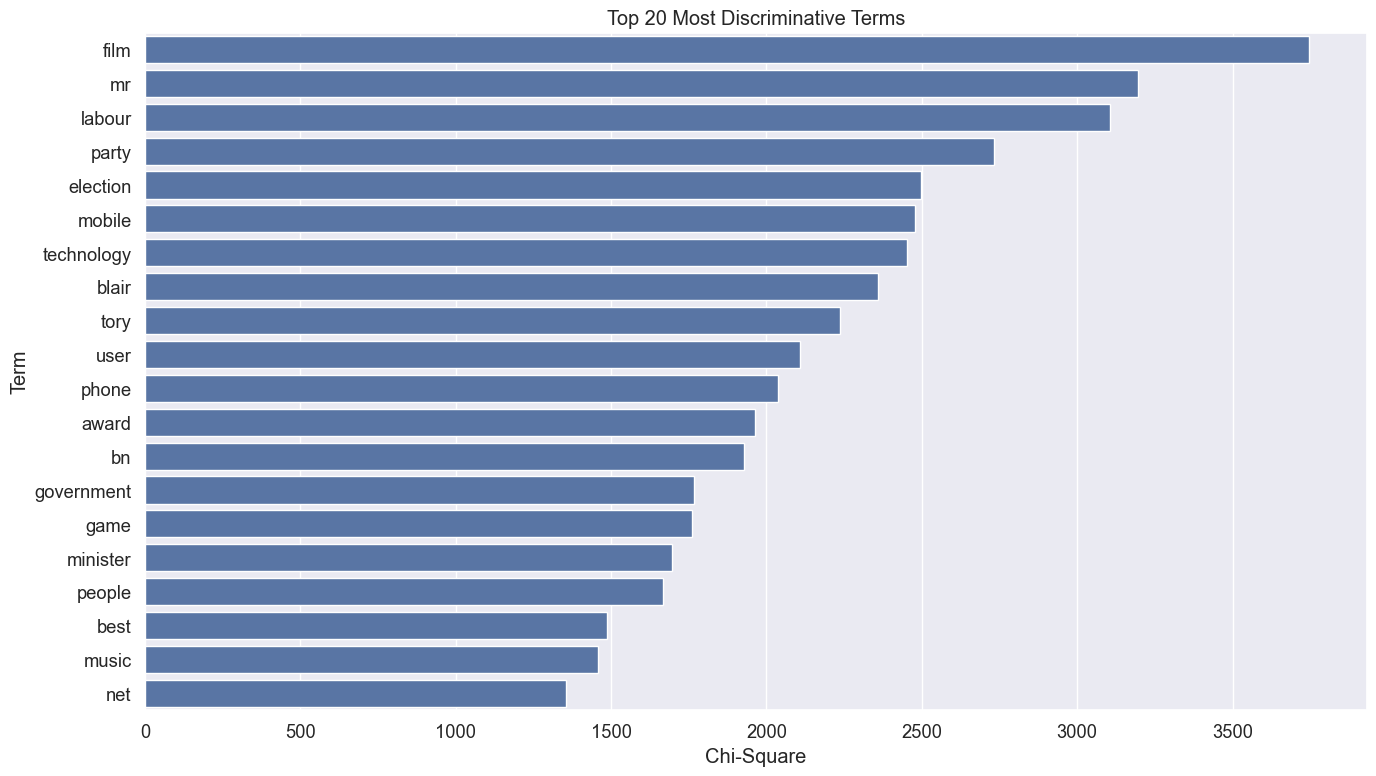


5.2 Feature importance preliminary assessment

Calculating class-specific term frequencies...

Most characteristic terms for each class:

  business:
    bank: 16.98x more frequent than in other classes
    growth: 14.87x more frequent than in other classes
    bn: 14.53x more frequent than in other classes
    economy: 12.88x more frequent than in other classes
    price: 10.64x more frequent than in other classes
    share: 10.16x more frequent than in other classes
    market: 5.57x more frequent than in other classes
    business: 4.27x more frequent than in other classes
    sale: 4.12x more frequent than in other classes
    company: 4.07x more frequent than in other classes

  entertainment:
    award: 26.03x more frequent than in other classes
    film: 24.02x more frequent than in other classes
    star: 15.81x more frequent than in other classes
    best: 8.43x more frequent than in other classes
    music: 4.51x more frequent than in other classes
    director: 4.14x more f

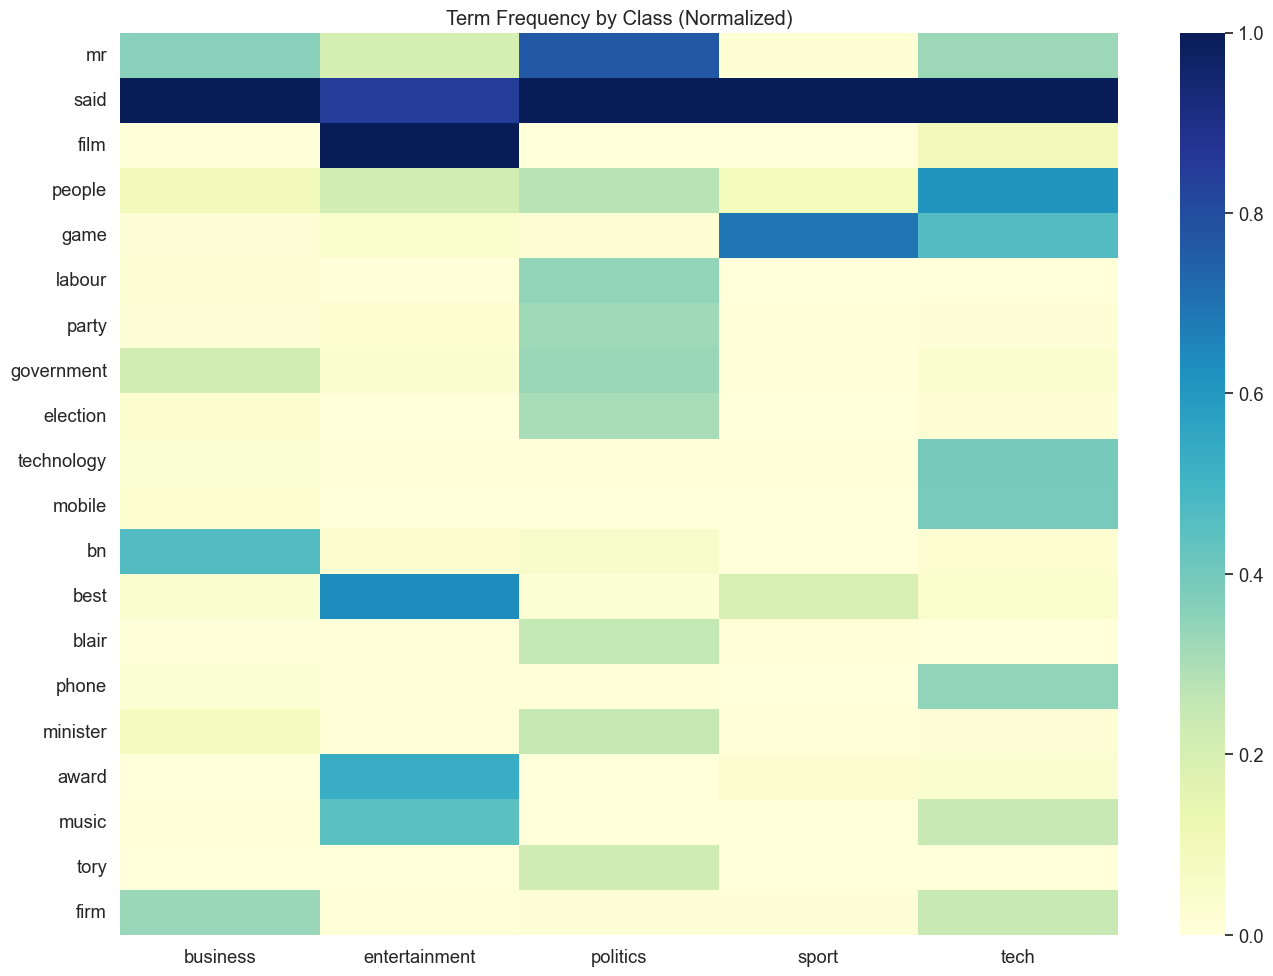

In [21]:
print("\n" + "="*80)
print("5. FEATURE CORRELATION")
print("="*80)

print("\n5.1 Statistical relationship between text features and classes")

# Create a document-term matrix for feature analysis
print("\nCreating document-term matrix...")
count_vectorizer = CountVectorizer(max_features=100, stop_words='english')
dtm = count_vectorizer.fit_transform(df_sample[text_field_to_analyze])
terms = count_vectorizer.get_feature_names_out()

# Convert to DataFrame for easier analysis
dtm_df = pd.DataFrame(dtm.toarray(), columns=terms)
dtm_df[category_field] = df_sample[category_field].values

# Calculate chi-square statistics for each term
from sklearn.feature_selection import chi2

# Prepare term frequency matrix (X) and target variable (y)
X = dtm_df.drop(category_field, axis=1).values
y = dtm_df[category_field].values

# Calculate chi-square statistics
chi2_values, p_values = chi2(X, y)

# Create a DataFrame to store results
feature_importance = pd.DataFrame({
    'Term': terms,
    'Chi-Square': chi2_values,
    'p-value': p_values
})

# Sort by chi-square value
feature_importance = feature_importance.sort_values('Chi-Square', ascending=False)

# Print top discriminative terms
print("\nTop 20 most discriminative terms across classes:")
print(feature_importance.head(20))

# Visualize top discriminative terms
plt.figure(figsize=(14, 8))
sns.barplot(x='Chi-Square', y='Term', data=feature_importance.head(20))
plt.title('Top 20 Most Discriminative Terms')
plt.tight_layout()
plt.show()
plt.close()

print("\n5.2 Feature importance preliminary assessment")

# Calculate class-specific term frequencies
print("\nCalculating class-specific term frequencies...")

# Create a DataFrame to store term frequency by class
term_freq_by_class = pd.DataFrame(index=terms)

for cls in top_classes:
    # Get indices for this class
    class_indices = dtm_df[dtm_df[category_field] == cls].index.tolist()
    # Calculate mean term frequency in this class
    class_freq = dtm_df.iloc[class_indices].drop(category_field, axis=1).mean()
    term_freq_by_class[cls] = class_freq

# Identify most characteristic terms for each class
print("\nMost characteristic terms for each class:")
for cls in top_classes:
    # Get terms with highest relative frequency in this class
    relative_freq = term_freq_by_class[cls] / term_freq_by_class.drop(cls, axis=1).mean(axis=1)
    top_terms = relative_freq.sort_values(ascending=False).head(10)

    print(f"\n  {cls}:")
    for term, score in top_terms.items():
        print(f"    {term}: {score:.2f}x more frequent than in other classes")

# Create heatmap of term frequency by class
term_freq_heatmap = term_freq_by_class.copy()

# Select top terms based on variance across classes
term_variance = term_freq_by_class.var(axis=1)
top_variable_terms = term_variance.sort_values(ascending=False).head(20).index.tolist()

# Create heatmap with only the most variable terms
term_freq_heatmap = term_freq_heatmap.loc[top_variable_terms]

# Scale the data for better visualization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
heatmap_data = pd.DataFrame(
    scaler.fit_transform(term_freq_heatmap),
    index=term_freq_heatmap.index,
    columns=term_freq_heatmap.columns
)

# Create heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, annot=False, cmap='YlGnBu')
plt.title('Term Frequency by Class (Normalized)')
plt.tight_layout()
plt.show()
plt.close()

# 6. ADVANCED VISUALIZATIONS


6. ADVANCED VISUALIZATIONS

6.1 t-SNE or PCA of document embeddings

Creating document embeddings...
Applying SVD...
Applying t-SNE...
Applying PCA...


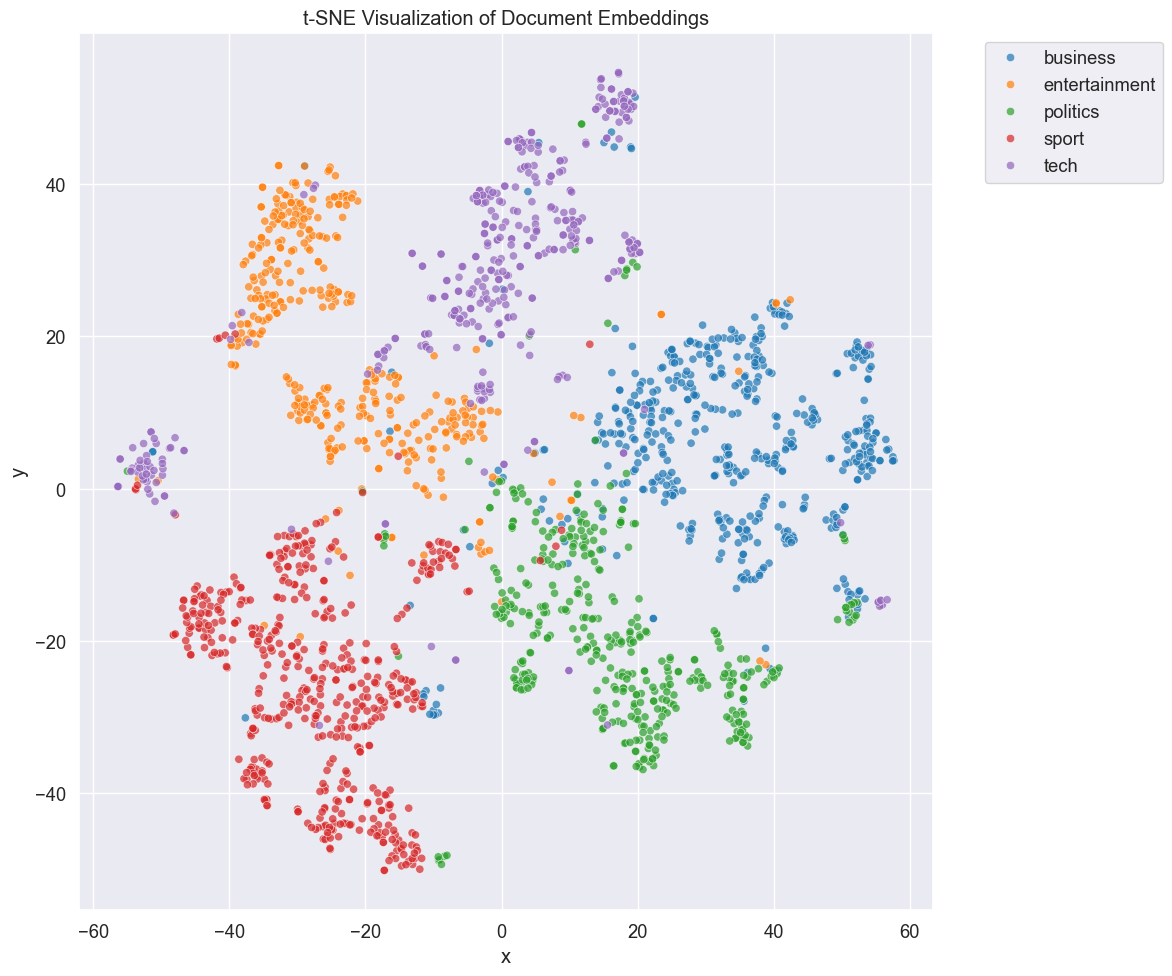

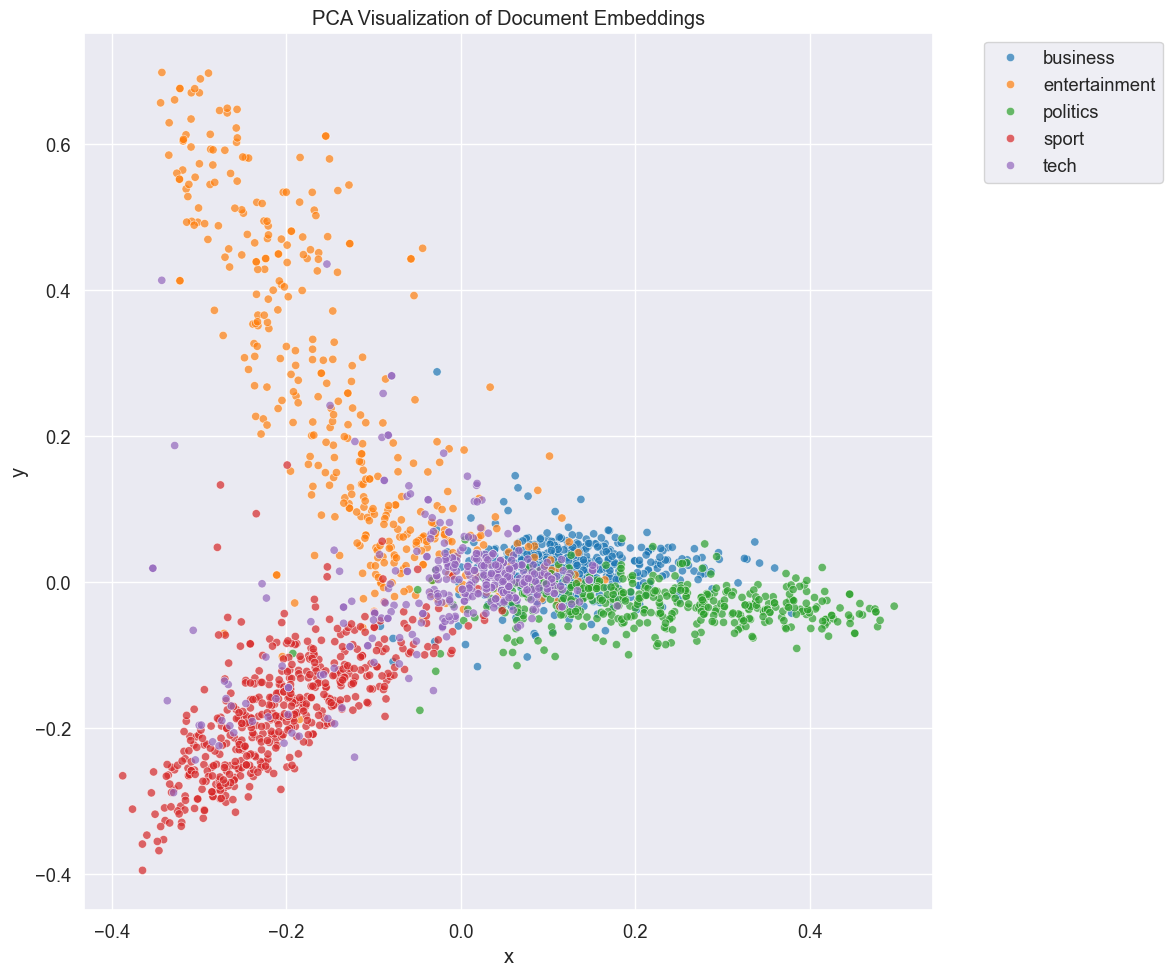


Variance explained by first two PCA components: 14.66%

6.2 Hierarchical clustering dendrograms

Performing hierarchical clustering...


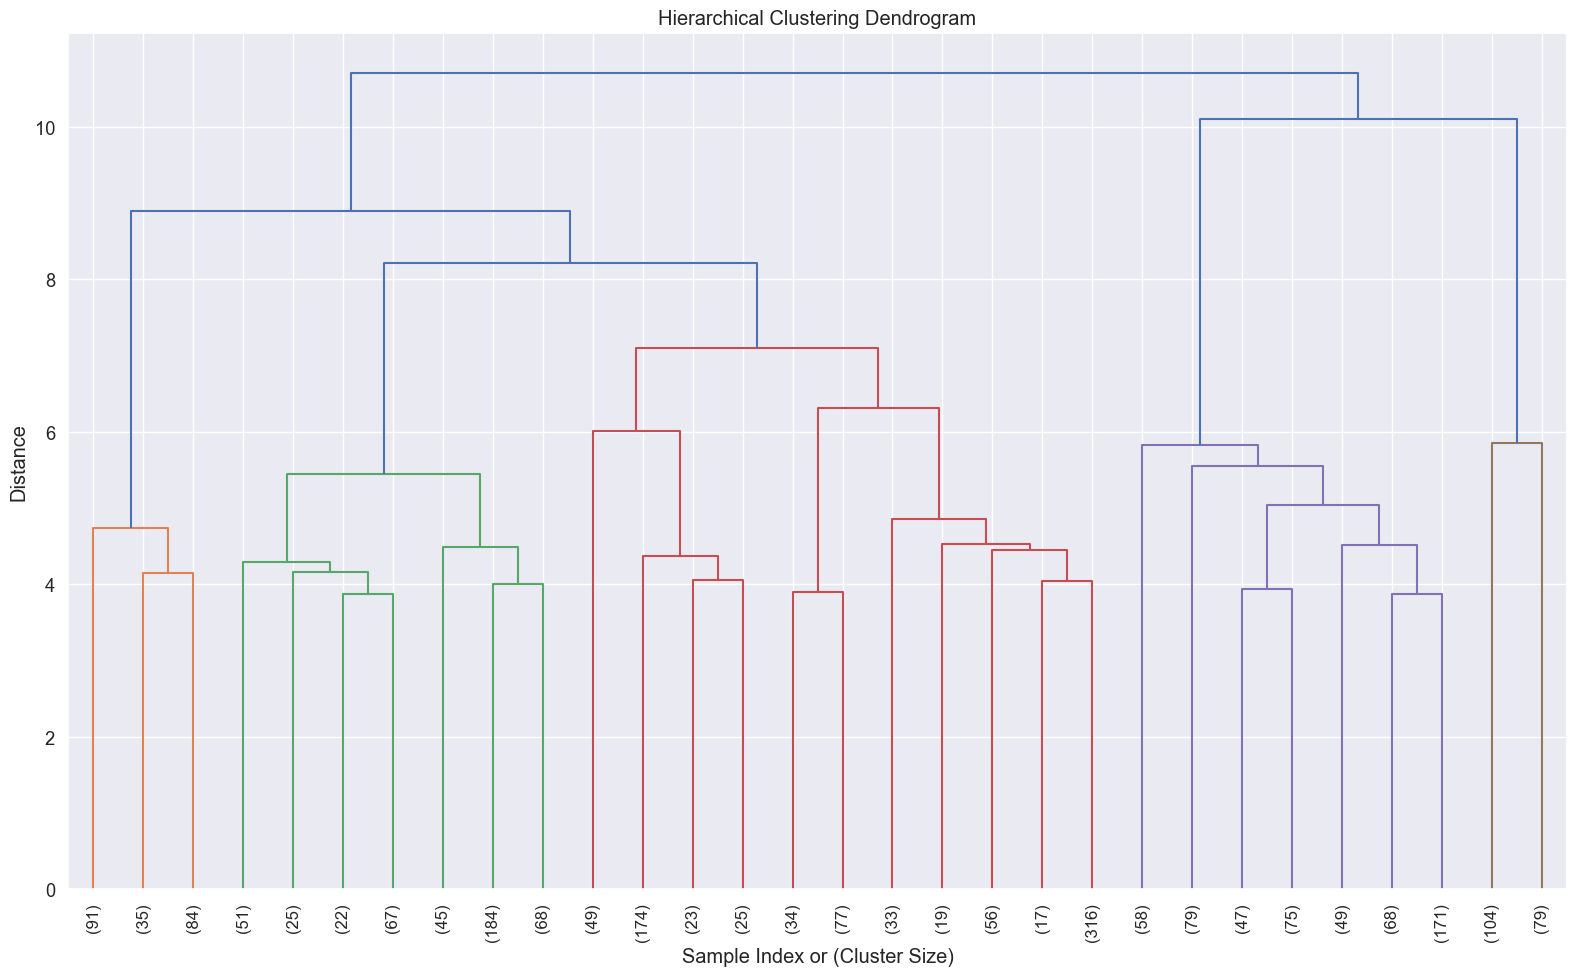

Clustering documents into 5 clusters...


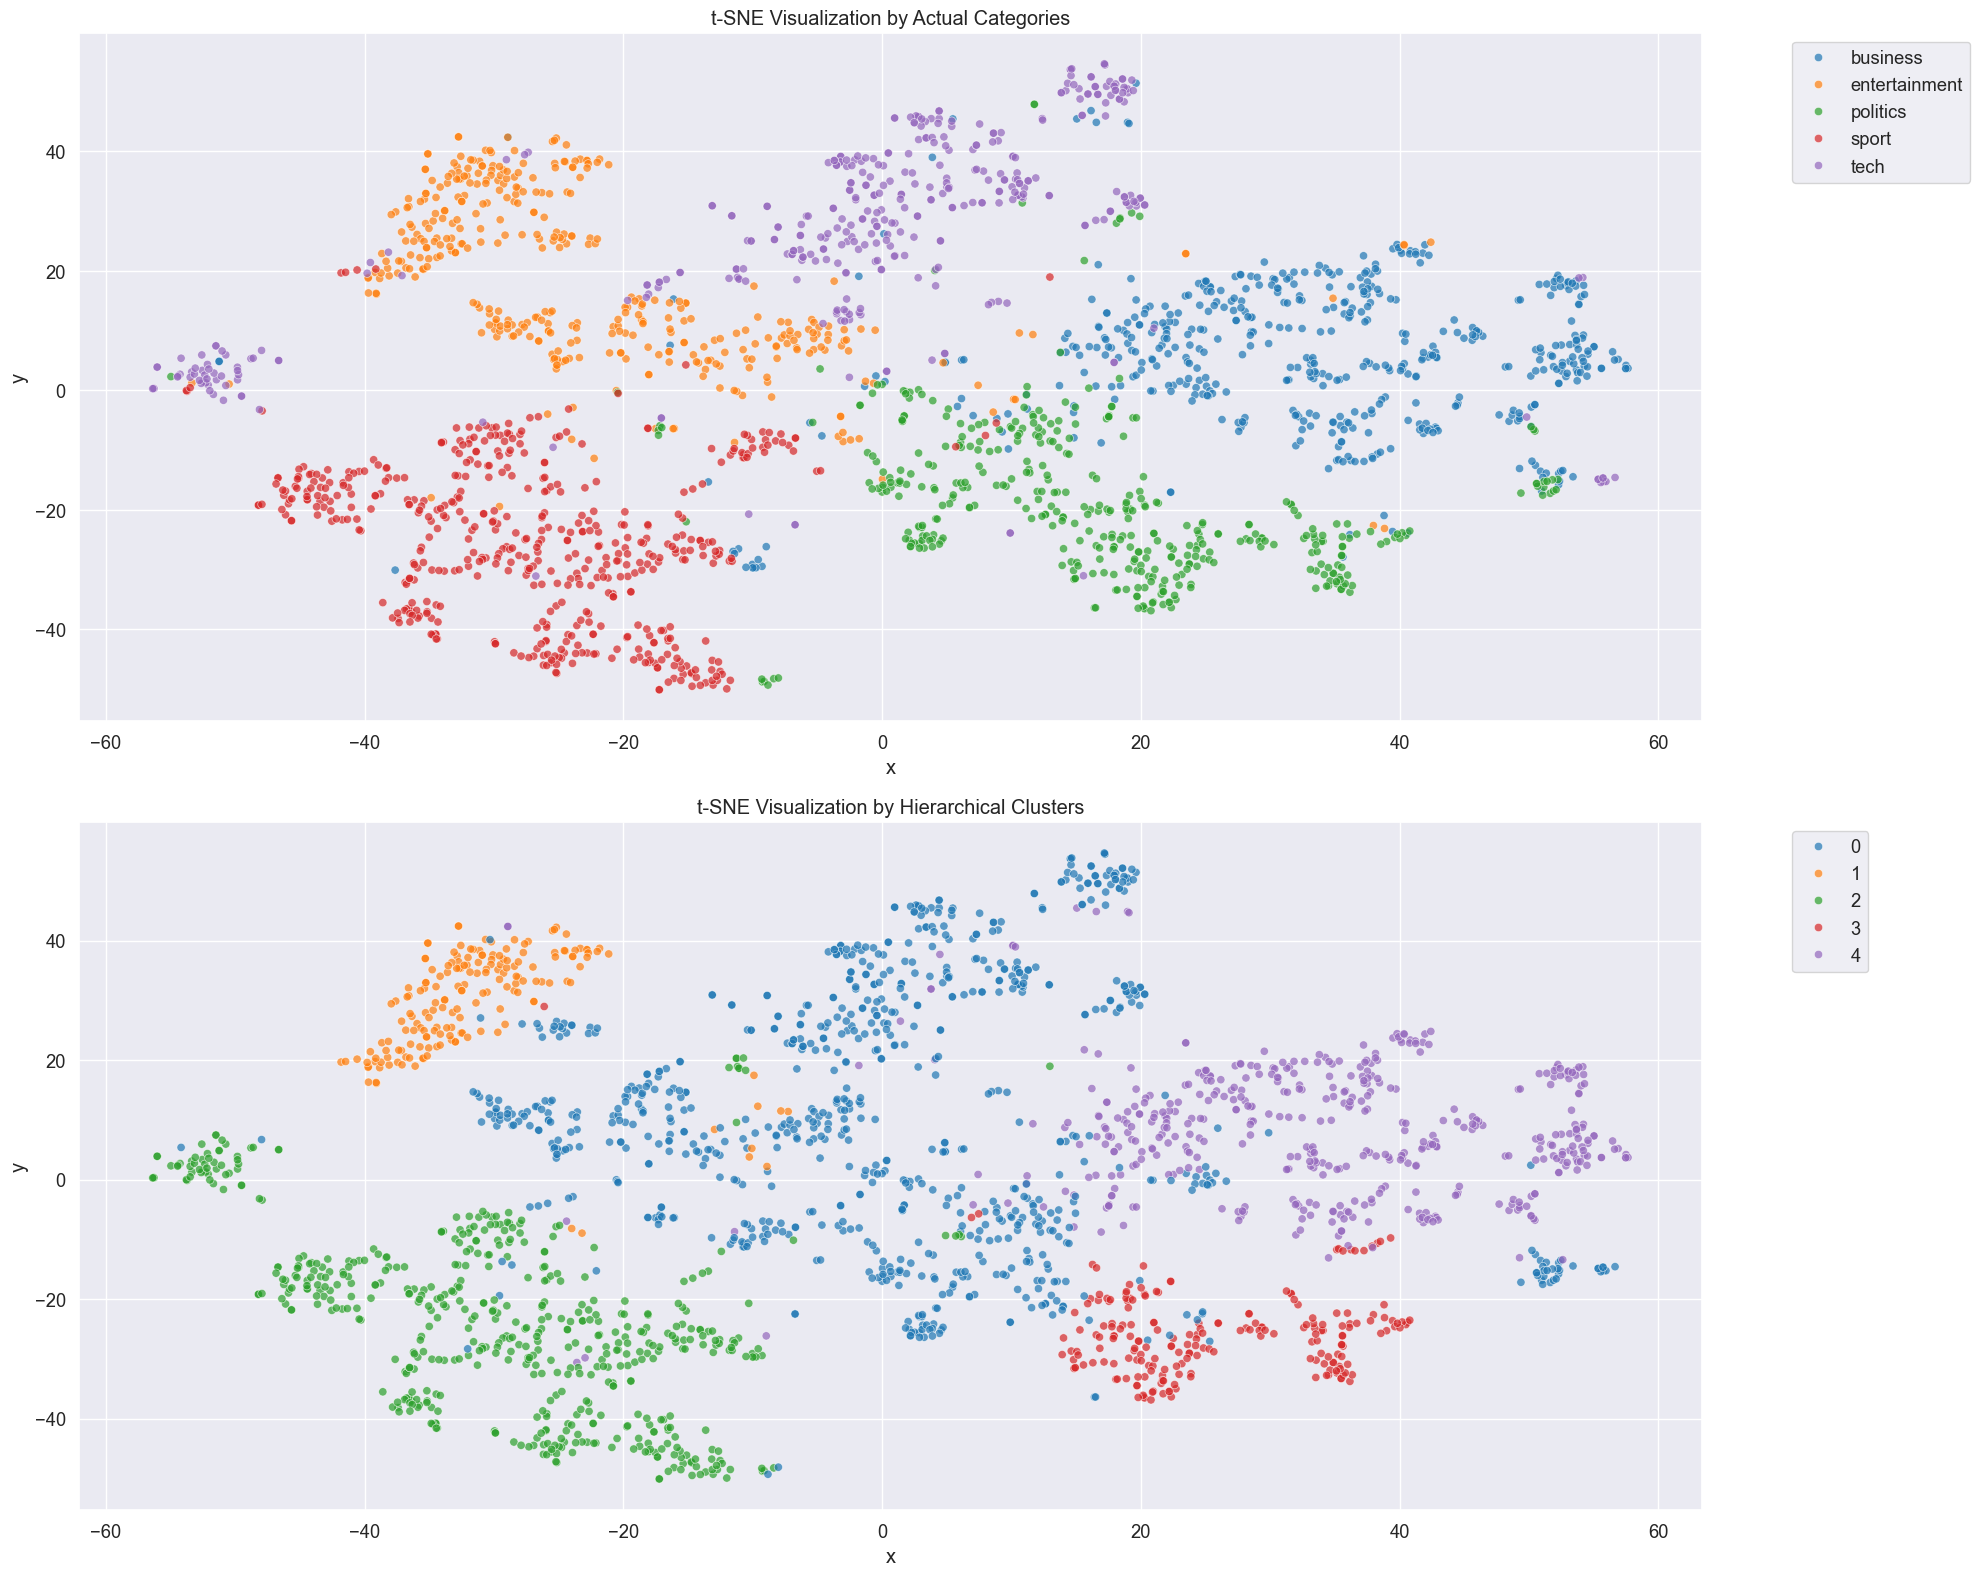


Cluster purity: 0.7020


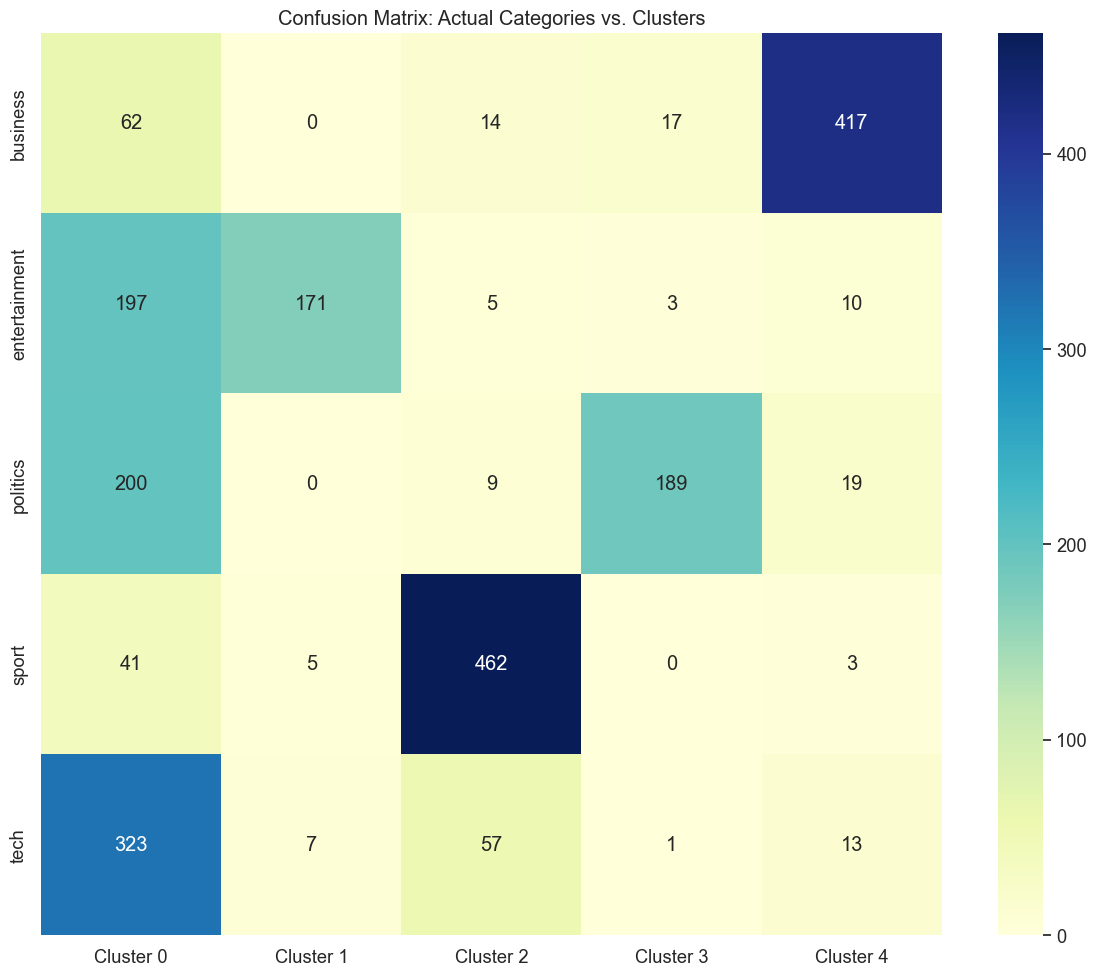

In [22]:
print("\n" + "="*80)
print("6. ADVANCED VISUALIZATIONS")
print("="*80)

print("\n6.1 t-SNE or PCA of document embeddings")

# Fill NaN values with empty strings
print("\nCreating document embeddings...")
df_sample[text_field_to_analyze] = df_sample[text_field_to_analyze].fillna('')

# Create document embeddings
tfidf_vectorizer = TfidfVectorizer(max_features=300, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df_sample[text_field_to_analyze])

# Apply dimensionality reduction
# First reduce dimensions with SVD (faster than applying t-SNE directly to high-dim data)
print("Applying SVD...")
svd = TruncatedSVD(n_components=50, random_state=42)
svd_embeddings = svd.fit_transform(tfidf_matrix)

# Apply t-SNE on SVD embeddings
print("Applying t-SNE...")
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_embeddings = tsne.fit_transform(svd_embeddings)

# Apply PCA
print("Applying PCA...")
pca = PCA(n_components=2, random_state=42)
pca_embeddings = pca.fit_transform(svd_embeddings)

# Create dataframes for visualization
tsne_df = pd.DataFrame({
    'x': tsne_embeddings[:, 0],
    'y': tsne_embeddings[:, 1],
    category_field: df_sample[category_field].values
})

pca_df = pd.DataFrame({
    'x': pca_embeddings[:, 0],
    'y': pca_embeddings[:, 1],
    category_field: df_sample[category_field].values
})

# Visualize t-SNE embeddings
plt.figure(figsize=(12, 10))
sns.scatterplot(x='x', y='y', hue=category_field, data=tsne_df, palette='tab10', alpha=0.7)
plt.title('t-SNE Visualization of Document Embeddings')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
plt.close()

# Visualize PCA embeddings
plt.figure(figsize=(12, 10))
sns.scatterplot(x='x', y='y', hue=category_field, data=pca_df, palette='tab10', alpha=0.7)
plt.title('PCA Visualization of Document Embeddings')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
plt.close()

# Print variance explained by PCA
print(f"\nVariance explained by first two PCA components: {pca.explained_variance_ratio_.sum()*100:.2f}%")

print("\n6.2 Hierarchical clustering dendrograms")

# Perform hierarchical clustering
print("\nPerforming hierarchical clustering...")

# First, reduce dimensionality for better clustering performance
# Use SVD instead of PCA to avoid converting to dense array
svd_for_clustering = TruncatedSVD(n_components=min(100, tfidf_matrix.shape[1]), random_state=42)
reduced_features = svd_for_clustering.fit_transform(tfidf_matrix)  # No need for toarray()

# Calculate linkage matrix
linkage_matrix = linkage(reduced_features, method='ward')

# Draw dendrogram
plt.figure(figsize=(16, 10))
dendrogram(
    linkage_matrix,
    truncate_mode='lastp',  # Show only the last p merged clusters
    p=30,  # Show only 30 nodes
    leaf_rotation=90.,
    leaf_font_size=12.
)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index or (Cluster Size)')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()
plt.close()

# Perform clustering with specific number of clusters
n_clusters = len(top_classes)
print(f"Clustering documents into {n_clusters} clusters...")

# Apply hierarchical clustering
cluster_model = AgglomerativeClustering(n_clusters=n_clusters)
clusters = cluster_model.fit_predict(reduced_features)

# Add cluster labels to the t-SNE visualization
tsne_cluster_df = tsne_df.copy()
tsne_cluster_df['cluster'] = clusters

# Visualize clusters on t-SNE plot
plt.figure(figsize=(20, 16))

# First subplot: colored by actual categories
plt.subplot(2, 1, 1)
sns.scatterplot(x='x', y='y', hue=category_field, data=tsne_cluster_df, palette='tab10', alpha=0.7)
plt.title('t-SNE Visualization by Actual Categories')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Second subplot: colored by predicted clusters
plt.subplot(2, 1, 2)
sns.scatterplot(x='x', y='y', hue='cluster', data=tsne_cluster_df, palette='tab10', alpha=0.7)
plt.title('t-SNE Visualization by Hierarchical Clusters')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()
plt.close()

# Evaluate cluster purity
from sklearn.metrics import confusion_matrix

# Create confusion matrix between actual categories and predicted clusters
conf_matrix = confusion_matrix(
    [list(top_classes).index(cat) for cat in tsne_cluster_df[category_field]],
    tsne_cluster_df['cluster']
)

# Calculate purity
cluster_to_class = {}
for i in range(n_clusters):
    cluster_to_class[i] = np.argmax(conf_matrix[:, i])

correct_assignments = 0
for i, cluster in enumerate(tsne_cluster_df['cluster']):
    true_class_idx = list(top_classes).index(tsne_cluster_df[category_field].iloc[i])
    if cluster_to_class[cluster] == true_class_idx:
        correct_assignments += 1

purity = correct_assignments / len(tsne_cluster_df)
print(f"\nCluster purity: {purity:.4f}")

# Create confusion matrix visualization
plt.figure(figsize=(12, 10))
conf_df = pd.DataFrame(conf_matrix, index=top_classes, columns=[f"Cluster {i}" for i in range(n_clusters)])
sns.heatmap(conf_df, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Confusion Matrix: Actual Categories vs. Clusters')
plt.tight_layout()
plt.show()
plt.close()

# 7. EDA SUMMARY

In [23]:
print("\n" + "="*80)
print("7. EDA SUMMARY")
print("="*80)

print("\nKey findings from exploratory data analysis:")

# Vocabulary findings
print("\nVocabulary Analysis:")
print(f"- Total unique words in sample: {len(set(word for tokens in df_sample['tokens'] for word in tokens))}")
print(f"- Average words per document: {df_sample['tokens'].apply(len).mean():.1f}")
print("- Class vocabulary overlap ranges from " +
      f"{overlap_matrix.values.min():.2f} to {overlap_matrix.values.max():.2f} (Jaccard similarity)")
print(f"- Most distinctive class by unique vocabulary: {max(unique_word_counts.items(), key=lambda x: x[1])[0]}")

# Text features
print("\nText Features:")
print(f"- Most common words overall: {', '.join(word for word, _ in overall_word_freq[:5])}")
print(f"- Most common bigram: {bigrams[0][0]} ({bigrams[0][1]} occurrences)")
print(f"- Most common trigram: {trigrams[0][0]} ({trigrams[0][1]} occurrences)")
print(f"- Class with longest documents: {word_count_stats['mean'].idxmax()} (avg: {word_count_stats['mean'].max():.1f} words)")
print(f"- Class with shortest documents: {word_count_stats['mean'].idxmin()} (avg: {word_count_stats['mean'].min():.1f} words)")

# Linguistic patterns
print("\nLinguistic Patterns:")
print(f"- Most frequent part of speech: {max(grouped_pos_counts.items(), key=lambda x: x[1])[0]}")
pos_class_diff = (pos_by_class.max() - pos_by_class.min()).idxmax()
print(f"- Part of speech with greatest class variation: {pos_class_diff}")

# Semantic patterns
print("\nSemantic Patterns:")
print(f"- Within-class similarity is {np.mean(within_class_sim)/np.mean(between_class_sim):.2f}x higher than between-class")
most_similar_classes = class_avg_sim.unstack().sort_values(ascending=False)
most_similar_pair = most_similar_classes.index[1]  # Skip diagonal (self-similarity)
print(f"- Most similar classes: {most_similar_pair[0]} and {most_similar_pair[1]} " +
      f"(similarity: {most_similar_classes.iloc[1]:.4f})")

# Clustering insights
print("\nClustering Insights:")
print(f"- Cluster purity: {purity:.4f}")
print(f"- Variance explained by first two PCA components: {pca.explained_variance_ratio_.sum()*100:.2f}%")


7. EDA SUMMARY

Key findings from exploratory data analysis:

Vocabulary Analysis:
- Total unique words in sample: 24749
- Average words per document: 218.5
- Class vocabulary overlap ranges from 0.28 to 1.00 (Jaccard similarity)
- Most distinctive class by unique vocabulary: sport

Text Features:
- Most common words overall: said, year, mr, would, also
- Most common bigram: last year (502 occurrences)
- Most common trigram: told bbc news (147 occurrences)
- Class with longest documents: tech (avg: 286.5 words)
- Class with shortest documents: sport (avg: 182.2 words)

Linguistic Patterns:
- Most frequent part of speech: Nouns
- Part of speech with greatest class variation: Nouns

Semantic Patterns:
- Within-class similarity is 1.30x higher than between-class
- Most similar classes: entertainment and entertainment (similarity: 0.1156)

Clustering Insights:
- Cluster purity: 0.7020
- Variance explained by first two PCA components: 14.66%
